python的序列类型：

字符串：连续字符，丰富的字符串处理方法

元组：有序的多个元素，不可变

列表：有序的多个元素，通过下标访问，可变

字典：无序，可以通过key访问

集合：无序，不重复，集合运算

需要什么pip包下不动时,在末尾添加: -i https://pypi.mirrors.ustc.edu.cn/simple/

# python基础

对象：Python中各种数据（信息）的抽象 一个对象一般是一个id跟着一个值 || 一个变量是一个或者一串指针

常用内置对象:
数字int float complex 布尔型bool 字节串bytes 列表list[] 字典dict{} 元组tuple()-(不可变) 集合set/frozenset{}-(元素不重复) 

Python语言中变量仅仅是对象的引用-变量只是指向存放指定值(对象)的内存区域的指针,赋予新的值就指向另一个对象

C/C++中变量对应的是数据（对象）-内存中的一块区域赋值了对应数据

有些对象一旦创建其值不可变，比如数字、字符串、元组等

有些对象一旦创建其值可变,如列表、字典等

Python具有自动内存管理功能

解释器会跟踪所有的对象的引用情况，一旦发现某个对象不再有任何变量引用，垃圾回收机制在适当的时候会回收该对象，释放内存资源

del语句可显式解除变量与所指向对象之间的绑定，即删除了变量

del语句可解除列表list等可变序列中的元素的绑定，即删除该元素。 

In [42]:
a = 1 # 这个时候要用到1,1这个对象就被创建了,a指向了1,
b = 2
# 标识ID(identity): 对象一旦创建其ID不再改变，可以看成该对象在内存中的地址
print('',id(a))
print('',id(1))
print('',a is b)#根据id判断是否同一对象
print('',a is 1)#根据id判断是否同一对象
print('',type(a))
print('',isinstance(a,int)) # 对象是类型的一个实例

 94006124943904
 94006124943904
 False
 True
 <class 'int'>
 True


函数体可以只写一句pass语句为空语句，经常用在定义一个空函数，以后再扩充

相互之间有相应联系的一些函数以及变量组织在一起，放到同一个Python源文件（.py)，这个.py文件就是一个模块（module）

可以使用sys.modules.items()显示所有预加载模块的相关信息。
sys.builtin_module_names给出了Python解释器内置的模块
需要使用import sys,导入的模块保存在字典sys.modules中


可以使用dir函数查看任意模块中所有的对象列表,import sys,dir(sys),help(sys)

## 导入时到哪里查找模块文件?
首先，在当前文件夹中查找模块文件:
import os //
 os.getcwd()#获得当前文件夹
// s.chdir(“d:\\Python程序” )#改变当前文件夹


导入模块时会从sys.path给出的目录列表中查找:import sys
// sys.path

通过append自定义的目录到sys.path可以扩展搜索路径: sys.path.append(‘c:\\MyPythonLib’)

## __name__属性
每个Python程序在运行时都有一个“__name__”属性。

如果程序作为模块被导入，则其“__name__”属性的值被自动设置为模块名
如果程序独立运行,称为脚本(script)，则其“__name__”属性值被自动设置为“__main__”。

## 按照目录来组织模块，称为包(package)  
包的每个目录（比如foo)中都必须包含一个__init__.py文件 // 用于表示该目录是一个包。如果没有，被当作一个普通的目录
该文件甚至可以是一个空文件 // 
__init__.py也是一个模块，模块名为foo // 
一般__init__.py文件的主要用途是设置__all__变量以及所包含的包初始化所需的代码。其中__all__变量中定义的对象可以在使用from … import *时全部正确导入。
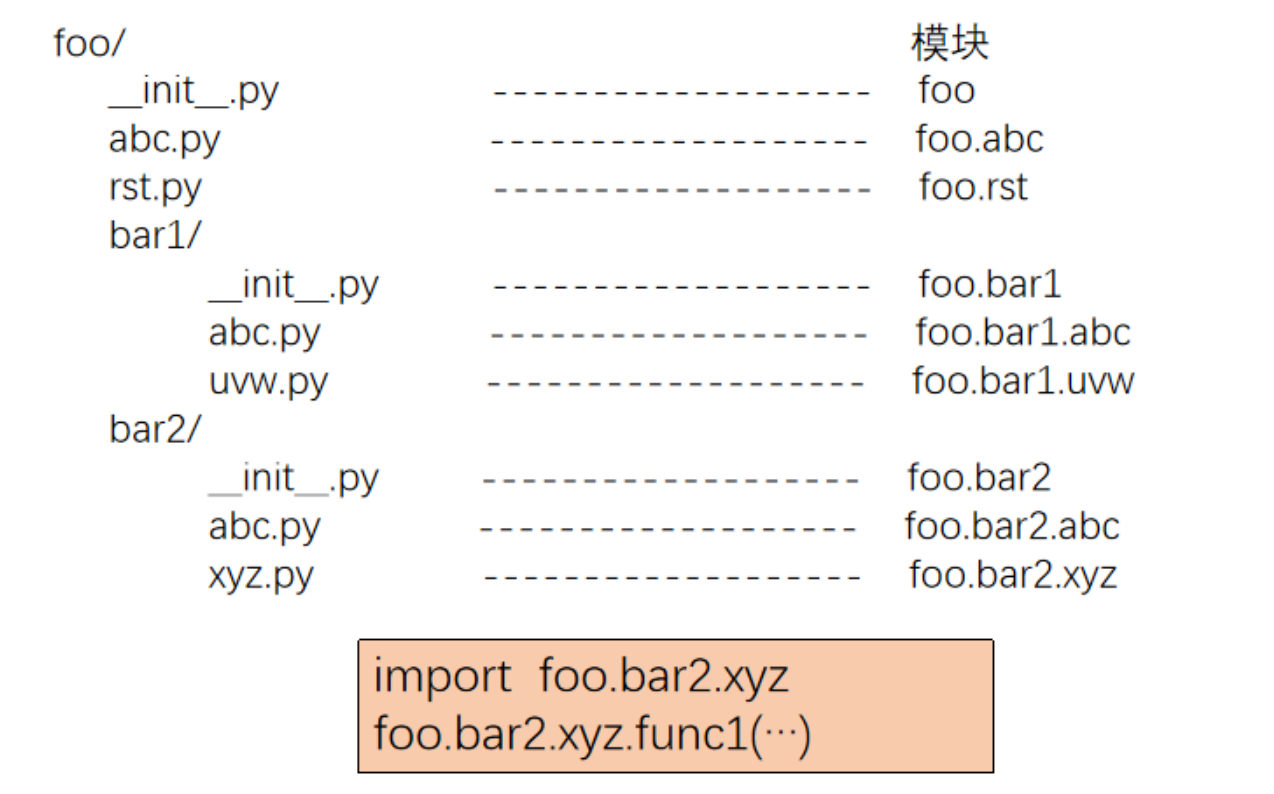

## 排序专题-内置方法sorted()

列表对象提供了sort()方法支持原地排序

内置函数sorted()返回新的列表，可对元组、列表、字典、集合等迭代对象、zip，enumerate等迭代器进行排序，借助于其key参数可以实现自定义的的排序。调用 key(element)返回的值来确定顺序

In [14]:
# 使用自己定义函数来作为sorted的key
persons = [{'name':'Dong', 'age':37}, {'name':'Zhang', 'age':40}, {'name':'Li', 'age':50}, {'name':'Dong', 'age':43}]
print(persons)
print()
# 使用key来指定排序依据，先按姓名升序排序，姓名相同的按年龄降序排序
def sort_by_name_age(x):
    return x['name'],-x['age'] # 把负号去掉就变成小到大排序
print(sorted(persons, key = sort_by_name_age))
print()
# 对于persons中的每个元素element 
# 调用该函数sort_by_name_age(element)
# 该函数返回值为一元组对象
# (element['name],-element['age])

# lambda的一行写法
print(sorted(persons, key=lambda x:(x['name'], x['age'])))

[{'name': 'Dong', 'age': 37}, {'name': 'Zhang', 'age': 40}, {'name': 'Li', 'age': 50}, {'name': 'Dong', 'age': 43}]

[{'name': 'Dong', 'age': 43}, {'name': 'Dong', 'age': 37}, {'name': 'Li', 'age': 50}, {'name': 'Zhang', 'age': 40}]

[{'name': 'Dong', 'age': 37}, {'name': 'Dong', 'age': 43}, {'name': 'Li', 'age': 50}, {'name': 'Zhang', 'age': 40}]


In [17]:
# operator模块的itemgetter函数：
# itemgetter(item)     itemgetter(*items) 
# temgetter返回的是一个函数对象f，该函数对象f在被调用【即f(obj)实参为obj】时，
# 将调用对应对象obj的__getitem__(item)方法，即obj[item]
phonebook = {'Linda':'7750', 'Bob':'9345', 'Carol':'5834'}
from operator import itemgetter
print(sorted(phonebook.items(),key=itemgetter(1)))
# 按字典中元素的值进行排序, key((‘Carol’,’5834))返回(‘Carol’,’5834’)[1]
print()
print(sorted(phonebook.items(),key=itemgetter(0)))
# 按字典中元素的键进行排序,key((‘Carol’,’5834))返回(‘Carol’,’5834’)[0]

[('Carol', '5834'), ('Linda', '7750'), ('Bob', '9345')]

[('Bob', '9345'), ('Carol', '5834'), ('Linda', '7750')]


In [20]:
# itemgetter详解
gameresult = [['Bob', 95.0, 'A'], ['Alan', 86.0, 'C'], ['Mandy', 83.5, 'A'], ['Rob', 89.3, 'E']]

print(sorted(gameresult, key=itemgetter(0, 1)),'\n') 
# 按姓名升序，姓名相同按分数升序排序

print(sorted(gameresult, key=itemgetter(1, 0)),'\n') 
# 按分数升序，分数相同的按姓名升序排序

print(sorted(gameresult, key=itemgetter(2, 1)),'\n') 
# 按等级升序，等级相同的按姓名升序排序

[['Alan', 86.0, 'C'], ['Bob', 95.0, 'A'], ['Mandy', 83.5, 'A'], ['Rob', 89.3, 'E']] 

[['Mandy', 83.5, 'A'], ['Alan', 86.0, 'C'], ['Rob', 89.3, 'E'], ['Bob', 95.0, 'A']] 

[['Mandy', 83.5, 'A'], ['Bob', 95.0, 'A'], ['Alan', 86.0, 'C'], ['Rob', 89.3, 'E']] 



In [21]:
gameresult = [{'name':'Bob', 'wins':10, 'losses':3, 'rating':75.0},
              {'name':'David', 'wins':3, 'losses':5, 'rating':57.0},
              {'name':'Carol', 'wins':4, 'losses':5, 'rating':57.0},
              {'name':'Patty', 'wins':9, 'losses':3, 'rating':72.8}]
print(sorted(gameresult, key=itemgetter('wins', 'name')))

[{'name': 'David', 'wins': 3, 'losses': 5, 'rating': 57.0}, {'name': 'Carol', 'wins': 4, 'losses': 5, 'rating': 57.0}, {'name': 'Patty', 'wins': 9, 'losses': 3, 'rating': 72.8}, {'name': 'Bob', 'wins': 10, 'losses': 3, 'rating': 75.0}]


In [24]:
# 如何根据另外一个列表list1的值来对当前列表list2元素进行排序
# 先用zip组合对应位置的元素对后排序（首先按list1其次list2）

list1 = ["what", "I'm", "sorting", "by"]
list2 = ["something", "else", "to", "sort"]
pairs = zip(list1, list2)
pairs = sorted(pairs)
print(pairs)
result = [x[1] for x in pairs]
print(result)

[("I'm", 'else'), ('by', 'sort'), ('sorting', 'to'), ('what', 'something')]
['else', 'sort', 'to', 'something']


# list专题
list里面元素其实是对象的引用（其实质为一个id开头跟着一排指针）每个重复元素所指向对象（地址）是相同的。list的底层是链表

del list_var[index]
del list_var

如果是通过下标来修改序列中元素的值或通过可变序列对象自身提供的方法来增加和删除元素时，序列对象在内存中的起始地址是不变的,变的是对应的元素所指向对象或者序列对象的元素增删。
当不再使用时，使用del命令删除整个列表，如果列表对象变量所指向的值（对象）不再有其他对象变量指向它，Python将同时删除该值（对象）。



In [4]:
# 拷贝专题
# list(list_a)可以创建一个新的list，同时里面每个元素指向list_a值指向的元素，本质还是一重指针
a = [1,2,[-3,4]]
b = list(a)
b[0] = -1 #在这里，其实质只是b[0]这个指针指向了-1这个对象
print(a,b)
b[2][0] = 3 #[-3,4]中的第一个元素值向了3这个元素
print(a,b)
# list.copy()-浅拷贝- 只拷贝一层
a = [1,2,3]
b = a.copy()
print(a,b)
b[1] = 4 #改变的是b[1]指向得对象
print(a,b)
c = a # 此时c列表直接指向了a列表，共进退
c[1] = 3
print(c,a)

[1, 2, [-3, 4]] [-1, 2, [-3, 4]]
[1, 2, [3, 4]] [-1, 2, [3, 4]]
[1, 2, 3] [1, 2, 3]
[1, 2, 3] [1, 4, 3]
[1, 3, 3] [1, 3, 3]


In [24]:
# 增删改查
#用‘+’运算符并不是真的为列表添加元素，而是创建一个新列表，并将原列表中的元素和新元素依次复制到新列表的内存空间。
#涉及大量元素添加时不建议使用该方法。
a = [3,4,5]
print(a)
a = a + [7]
print(a)
a.append([6,7])# 原地修改，整个元素加入
print('append([6,7]):',a)
a.extend([6,7])# 原地操作，可将别的迭代器元素加入，更常用
print('extend([6,7]):',a)
a.insert(1,'x')# 设计之后元素移动，速度慢，建议append和pop
print('insert([6,7]):',a)
a.pop(7) #默认pop最后一个
print('pop(7):',a)
a.remove(7) #默认remove最先的一个
print('remove(7):',a)
b = [[1,2,3]]*3 # 生成一个新列表，新列表是原列表中元素的重复。
print('*3:',b) # 重复元素实际上是多个元素指向同一对象
b[0][0]=10
print('change[0][0]:',b)

[3, 4, 5]
[3, 4, 5, 7]
append([6,7]): [3, 4, 5, 7, [6, 7]]
extend([6,7]): [3, 4, 5, 7, [6, 7], 6, 7]
insert([6,7]): [3, 'x', 4, 5, 7, [6, 7], 6, 7]
pop(7): [3, 'x', 4, 5, 7, [6, 7], 6]
remove(7): [3, 'x', 4, 5, [6, 7], 6]
*3: [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
change[0][0]: [[10, 2, 3], [10, 2, 3], [10, 2, 3]]


In [3]:
# 遍历list方法.1
monthNames =['January','February','March',

         'April','May','June','July','August',

         'September','October','November','December']
month = 1

for name  in monthNames:
    #print("%2d月的英文是%s" % (month,monthNames[month-1]))
    print("%2d月的英文是%s" % (month,name))#更好的写法
    month = month + 1
#.2
monthNames =['January','February','March',

             'April','May','June','July','August',

             'September','October','November','December']
for index in range(12): # 用index和用range对象遍历列表元素
    print("%2d月的英文是%s" % (index+1,monthNames[index]))

 1月的英文是January
 2月的英文是February
 3月的英文是March
 4月的英文是April
 5月的英文是May
 6月的英文是June
 7月的英文是July
 8月的英文是August
 9月的英文是September
10月的英文是October
11月的英文是November
12月的英文是December


In [31]:
x = [1,2,1,2,1,2,1,1,2,1,1]
# 错误的遍历List进行删除
for i in x: # 这里的i其实＝x[pos]，每次ｐｏｓ＋＋
    if i == 1:
        x.remove(i) # 每当插入或删除一个元素之后，该元素位置后面所有元素的索引就都改变了。
print('wrongA:',x)
# 在循环的判断条件部分，使用新的列表（如列表的切片）替代原始列表，这样即使原始列表因元素删除或增加而变化，作为循环判断的新列表不会变化。
x = [1,2,1,2,1,2,1,1,2,1,1]
for i in list(x): # 使用列表的切片替代原始列表，这样即使原始列表因元素删除或增加而变化，切片时已经生成的列表不会变化。
    if i == 1:
        x.remove(i)
print('copylist来循环:',x)
#
x = [1,2,1,2,1,2,1,1,2,1,1]
for i in range(len(x)-1,-1,-1):# range(start, stop, step),start默认0,stop终点不包括,step步长默认1
    if x[i]==1:
        del x[i]
print('用range循环:',x) # 推荐这个
#
#下面是列表推导式,简化的代码
x = [i for i in x if i !=1]  # 这个牛逼
print('''简化的形式:''',x)

wrongA: [2, 2, 2, 2, 1, 1]
copylist来循环: [2, 2, 2, 2]
用range循环: [2, 2, 2, 2]
简化的形式: [2, 2, 2, 2]


In [36]:
# 下标访问
a = [3,4,5,6,6,6,7,8,9]
print('下标访问:',a[0],a[1],a[-1])
# 返回指定值的首次出现下标记
print('返回指定值的首次出现的标记:',a.index(5))
# 统计指定元素在列表对象中出现的次数
print('统计指定元素在列表对象中出现的次数:',a.count(5),a.count(6),a.count(7))
# 成员判断
print('成员判断:',5 in a)

下标访问: 3 4 9
返回指定值的首次出现的标记: 2
统计指定元素在列表对象中出现的次数: 1 3 1
成员判断: True


  列表-排序-逆置-比较-返回最大最小和

In [56]:
# 使用列表对象的sort方法进行原地排序,使用列表对象的reverse方法将元素原地逆序
import random
a = list(range(10))
random.shuffle(a)
print(a)
b = a.copy()
print(a,b)
a.sort() # 默认升序
print(a,b)
b.sort(reverse=True)
print(a,b)

a = list(range(10))
random.shuffle(a)
print(a)
b = a.copy()
print(a,b)
a.reverse() # 默认升序
print(a,b)
b.reverse()
print(a,b)

# 使用内置函数sorted对列表进行排序并返回新列表
a = list(range(10))
random.shuffle(a)
print(a)
b = sorted(a)
print(a,b)
# 使用内置函数reversed方法对列表元素进行逆序排列并返回新的迭代器对象
random.shuffle(a)
print(a)
b = reversed(a)
print(a)
print(b)
print(list(b)) # 调用迭代器获得了所有内容，迭代器已遍历结束，只能迭代一次.所以为空列表

# list之间内置比较函数
a =[1,2,3]
b = [1,2,3]
print (a<b)
c = ['a','b','c']
d = ['e','f','g']
print(c<d)

# max(列表)、 min(列表)：返回列表中的最大或最小元素，同样适用于元组、range, 字符串等。
# sum(列表)：对数值型列表的元素进行求和运算，对非数值型列表运算则出错，同样适用于元组、range。
a = [1,2,3]
print(max(a),min(a),sum(a))

[5, 6, 4, 1, 9, 3, 2, 7, 0, 8]
[5, 6, 4, 1, 9, 3, 2, 7, 0, 8] [5, 6, 4, 1, 9, 3, 2, 7, 0, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [5, 6, 4, 1, 9, 3, 2, 7, 0, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[5, 9, 7, 4, 0, 2, 8, 1, 3, 6]
[5, 9, 7, 4, 0, 2, 8, 1, 3, 6] [5, 9, 7, 4, 0, 2, 8, 1, 3, 6]
[6, 3, 1, 8, 2, 0, 4, 7, 9, 5] [5, 9, 7, 4, 0, 2, 8, 1, 3, 6]
[6, 3, 1, 8, 2, 0, 4, 7, 9, 5] [6, 3, 1, 8, 2, 0, 4, 7, 9, 5]
[0, 8, 4, 7, 3, 2, 6, 5, 1, 9]
[0, 8, 4, 7, 3, 2, 6, 5, 1, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 1, 0, 7, 3, 6, 5, 8, 2, 4]
[9, 1, 0, 7, 3, 6, 5, 8, 2, 4]
[4, 2, 8, 5, 6, 3, 7, 0, 1, 9]
False
True
3 1 6


zip(列表1,列表2,…):将多个列表对应位置元素组合为元组，并返回包含这些元组的zip对象（迭代器）。Zip对象可以进一步用list()函数转换为列表对象。

In [58]:
aList = [1, 2, 3, 8]
bList = [4, 5, 6]
cZip = zip(aList, bList)
print(list(cZip))
print(list(cZip))  #迭代器已遍历结束，只能迭代一次.所以为空列表


[(1, 4), (2, 5), (3, 6)]
[]


enumerate(列表,start =0)：枚举列表元素，返回枚举对象（迭代器） ，其每个元素为包含下标和值的元组。该函数对元组、字符串同样有效。

In [63]:
dList = [5, 6, 7]
eEnum = enumerate(dList)
print(eEnum)
for item in eEnum:
    print(item)
print(list(eEnum)) #迭代器已遍历结束，只能迭代一次.所以为空列表

for i,val in enumerate(dList): #常用于遍历list,节省空间
    print(i,val)

(0, 5)
(1, 6)
(2, 7)
[]
0 5
1 6
2 7


iterable对象包括：  str,list,tuple,dict,set,range等

iterator包括：reversed(),zip(),enumerate() 等返回的对象 - 节省空间

内置函数 iter(iterable)可以返回一个iterator (不需要掌握）

内置函数next(iterator)从迭代器返回下一个元素，没有更多的元素时抛出异常StopIteration

二者都可以用for 循环进行遍历各个元素

for var in iterator(or iterable) 循环相当于每次取可迭代对象或者迭代器的下一个元素，执行一系列语句，然后取下一个元素执行，直到最后StopIteration时结束 


# 列表推导式 - 利用其他列表创建新列表的一种方法 - 函数式编程
语法： [表达式 for 变量 in 序列 ]    或者  [表达式 for 变量 in 序列 if 条件] 

对于序列中的每个成员（通过if条件筛选）计算一个新的表达式后保存在一个新列表里

In [73]:
# 语法： [ 2*k for k in range(100)]  或者  [ 2*k for k in range(100) if k %10 == 0]
#写法1：列表推导式
print([x**2 for x in range(10)])
#写法2：普通写法
a = []
for i in range(10):
    a.append(i**2)
print(a)
print([2*k for k in range(100) if k %10 == 0])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180]


In [77]:
# 元素求绝对值
vec= [-1,-4,6,7.5,-2.3,9,-11]
print([abs(x) for x in vec])

# 去掉前后的空格类字符
freshfruits = [' banana', ' loganberry ', ' passion fruit  ']  # strip只能删除开头或是结尾的字符，不能删除中间部分的字符。
print([fruit.strip() for fruit in freshfruits])

# 复杂条件表达式
print([v**2 if v%2 == 0 else v+1 for v in [2, 3, 5, 4, -1] if v>0])

# 产生一个班级（人数在45-90之间）的分数
exam_scores = [random.randint(50,100) for i in range(random.randint(45,90))]
print(exam_scores)

[1, 4, 6, 7.5, 2.3, 9, 11]
['banana', 'loganberry', 'passion fruit']
[4, 4, 6, 16]
[76, 97, 75, 94, 58, 74, 87, 77, 94, 64, 86, 82, 63, 51, 93, 69, 55, 59, 61, 98, 86, 82, 72, 76, 94, 72, 59, 88, 100, 80, 54, 83, 82, 63, 76, 97, 86, 85, 94, 57, 55, 86, 79, 91, 88, 78, 93, 98, 77, 79, 65, 77, 76, 82, 52, 73, 98, 51, 95, 60, 50, 51, 70, 73, 75, 84, 100, 51, 98, 85, 71, 85, 84, 97, 50, 83, 90, 66]


第一个for之后可以跟0或者多个for或者if子句

[expr for value in seq1 if condition1
 for  value2 in seq2  if condition2 
         …
 for  valueN in seqN if conditionN  ] 

In [87]:
# 生成两位数偶数的列表
list1 = [ x*10+y for x in range(10) if x != 0
                 for y in range(10) if y % 2 == 0]
print(list1)

# 在列表推导式中使用多个循环，实现多序列元素的任意组合，并且可以结合条件语句过滤特定元素
print([(x, y) for x in range(3) for y in range(3)])
# 对比：
print([(x, y) for x in [1, 2, 3] for y in [3, 1, 4] if x != y])
# 使用普通方法实现：
combs = []
for x in [1,2,3]: 
    for y in [3,1,4]: 
           if x != y:
                combs.append((x, y))
print(combs)

# 使用列表推导式实现嵌套列表的平铺，即新列表由最内层的列表元素组成
vec = [[1,2,3], [4,5,6], [7,8,9]] 
print([num for elem in vec for num in elem])

# 使用列表推导式的嵌套来实现矩阵转置
matrix = [ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
print([ [row[i] for row in matrix] for i in range(4)])
# 也可以使用内置函数来实现矩阵转置
list(zip(*matrix))  # list(zip(matrix[0], matrix[1], …, matrix[len(matrix)-1]) 

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]
[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]


[(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]

In [88]:
# 毕达哥拉斯三元数组：存在{x,y,z}, 0<x<y<z,使得x^2+y^2=z^2
# 求前nums个毕达哥拉斯三元数组
def pyt_firstN_list(nums):
    pyt = [(x,y,z) for z in range(100) 
            for y in range(1,z) 
            for x in range(1,y) if x*x + y*y == z*z ]
    firstN_pyt = pyt[:nums]
    print(firstN_pyt) 
pyt_firstN_list(50)

[(3, 4, 5), (6, 8, 10), (5, 12, 13), (9, 12, 15), (8, 15, 17), (12, 16, 20), (15, 20, 25), (7, 24, 25), (10, 24, 26), (20, 21, 29), (18, 24, 30), (16, 30, 34), (21, 28, 35), (12, 35, 37), (15, 36, 39), (24, 32, 40), (9, 40, 41), (27, 36, 45), (30, 40, 50), (14, 48, 50), (24, 45, 51), (20, 48, 52), (28, 45, 53), (33, 44, 55), (40, 42, 58), (36, 48, 60), (11, 60, 61), (39, 52, 65), (33, 56, 65), (25, 60, 65), (16, 63, 65), (32, 60, 68), (42, 56, 70), (48, 55, 73), (24, 70, 74), (45, 60, 75), (21, 72, 75), (30, 72, 78), (48, 64, 80), (18, 80, 82), (51, 68, 85), (40, 75, 85), (36, 77, 85), (13, 84, 85), (60, 63, 87), (39, 80, 89), (54, 72, 90), (35, 84, 91), (57, 76, 95), (65, 72, 97)]


In [90]:
# 已知有一个包含一些同学成绩的字典，计算成绩的最高分、最低分、平均分，并查找所有最高分同学
scores = {"Zhang San": 45, "Li Si": 78, "Wang Wu": 40, "Zhou Liu": 96, "Zhao Qi": 65, "Sun Ba": 90, "Zheng Jiu": 78, "Wu Shi": 99, "Dong Shiyi": 60}
highest = max(scores.values())
lowest = min(scores.values())
average = sum(scores.values())/len(scores)
highestPerson = [name for name, score in scores.items() if score == highest]
print(highestPerson)

['Wu Shi']


In [69]:
import os
[filename for filename in os.listdir('.') if filename.endswith('.py')] # 列出当前文件夹下所有Python源文件

['ner-client.py', 'test.py', 'trans.py']

## 生成器推导式
生成器推导式的结果是一个生成器对象。生成器对象类似于迭代器对象，具有惰性求值的特点，只在需要时生成新元素，比列表推导式具有更高的效率，空间占用非常少，尤其适合大数据处理的场合。

In [7]:
g = ((i+2)**2 for i in range(10)) #创建生成器对象
print(g)
print(tuple(g)) #将生成器对象转换为元组
print(list(g)) #生成器对象已遍历结束，没有元素了

# 使用生成器对象__next__()方法或内置函数next()进行遍历
g = ((i+2)**2 for i in range(10))
print(g.__next__()) # 使用生成器对象的__next__()方法获取元素
print(g.__next__()) # 获取下一个元素
print(next(g))# 使用函数next()获取生成器对象中的元素

<generator object <genexpr> at 0x0000021791FE6F48>
(4, 9, 16, 25, 36, 49, 64, 81, 100, 121)
[]
4


In [13]:
# 使用for循环直接迭代生成器对象中的元素
g = ((i+2)**2 for i in range(10))
for item in g:
    print(item,end = ' ') # end = ' '表示间隔
    
# 访问过的元素不再存在
g = ((i+2)**2 for i in range(10))
print(25 in g)
print(next(g))
print(25 in g) # 访问过的元素不再存在

4 9 16 25 36 49 64 81 100 121 True
36
False


In [14]:
# 例题 :毕达哥拉斯三元数组：存在{x,y,z}, 0<x<y<z,使得x^2+y^2=z^2。求前10个毕达哥拉斯三元数组
pyt = ((x,y,z) for z in range(1000) for y in range(1,z) for x in range(1,y) if x*x + y*y == z*z ) 
firstN_pyt = [next(pyt) for x in range(10) ] 
print(firstN_pyt) 

[(3, 4, 5), (6, 8, 10), (5, 12, 13), (9, 12, 15), (8, 15, 17), (12, 16, 20), (15, 20, 25), (7, 24, 25), (10, 24, 26), (20, 21, 29)]


## 字典推导式（解析式） 推导式生产dict就酷炫

In [48]:
dict_1 = {k:v for k,v in zip(['a','b','c'],[1,2,3])}
print(dict_1)

dict_2 = {k:v for k,v in [('x',1),('y',2),('z',3)]}
print(dict_2)

{'a': 1, 'b': 2, 'c': 3}
{'x': 1, 'y': 2, 'z': 3}


## set推导式（解析式）

In [5]:
a_set = {2*x for x in range(5)}
print(a_set)

{0, 2, 4, 6, 8}


# 切片 - 适用于列表、元组、字符串、range对象等类型

格式    -  s[start:stop:step]    - s[start : stop]

截取列表中的任何部分，得到一个新列表【切片返回的是列表元素的浅拷贝】

与使用下标访问列表元素的方法不同，切片操作不会因为下标越界而抛出异常，而是简单地在列表尾部截断或者返回一个空列表，代码具有更强的健壮性。

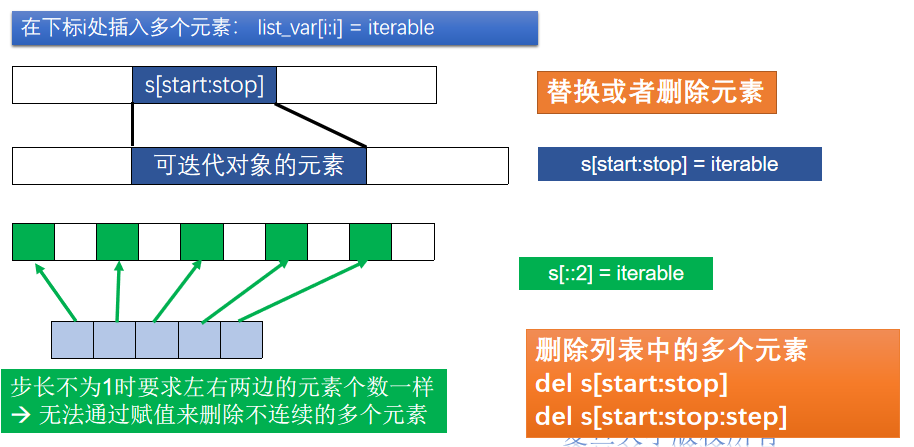

In [19]:
a = [0, 1, 2, 3, 4, 5, 6]  # len(a) = 7
# step可缺省为1，则表示列表中从start开始，每隔step的元素，直到stop（不包括）为止。
print(a[:],a[::]) # 相当于a[0:7:1]
print(a[::-1]) # 相当于a[-1:-7:-1]

# 当step为正数，即step>0，表示**从左往右**
print(a[::2])  # 此时start缺省为0（第一个元素），stop缺省为即 len(s)
print(a[4:1]) # 若 start ≥ stop，则切片为空

# 当step为负数，即step <0，表示 **从右往左** - 即为倒序
print(a[::-2])# 此时start缺省为-1（最后一个元素），而stop缺省为列表开始，即 –len(s)-1
print(a[1:4:-1]) # start表示的元素在stop的左边，则切片为空
print(a[1:-3],a[1:-3+len(a)]) # 当start、stop符号不同且未超出索引范围时，可以通过“负数值+len(aList)”的方法，使得负数变成正数

print(a[-100:100],a[-100:-200])# 切片允许start,stop越界,仅返回能遍历到的元素

[0, 1, 2, 3, 4, 5, 6] [0, 1, 2, 3, 4, 5, 6]
[6, 5, 4, 3, 2, 1, 0]
[0, 2, 4, 6]
[]
[6, 4, 2, 0]
[]
[1, 2, 3] [1, 2, 3]
[0, 1, 2, 3, 4, 5, 6] []


In [34]:
# 功能1 ： 可以使用切片来截取列表中的任何部分，得到一个新列表。
# 切片返回的是列表元素的浅拷贝,仅仅copy了原有列表各个元素（即对各个元素的引用）
list_a = [1,2,[4,5]]
list_b = list_a[:] # 即新列表和原列表相同位置的元素都指向同一个对象。
list_a[2][0] = 5
print(list_b)

# 功能2：可以使用切片来原地修改列表内容：切片下标对应的元素如果不为空，替换或者删除元素
a = [3,5,7,9,10]
a[:3] = [1,2,3,4] # 给列表的切片下标赋值list_var[slice]时相当于将下标指定位置的元素替换为赋值语句右边的元素
print(a) # 前三个元素换成1，2，3，4
a[:3] = [] # 相当于删除前面3个元素 
print(a)
# 步长不为1时要求左右两边的元素个数一样
b = list(range(10))
print([0]*(len(b)//2))
b[::2] = [0]*(len(b)//2) #//整除，/为浮点除
print(b)

# 切片下标对应的元素如果为空，添加新元素
a = [3,5,7]
a[len(a):] = [9,10] # 相当于extend([9,10]) 
print(a)
a[:0] = [-1,1] # 在前面添加元素
print(a)
a[3:3] = [500] # 第三个位置添加元素
print(a)

# 功能3：使用del与切片结合来删除列表元素(特别是间隔删除）
aList = [3,5,7,9,11]
del aList[:3]   # 相当于 aList[:3] = []
print(aList)



[1, 2, [5, 5]]
[1, 2, 3, 4, 9, 10]
[4, 9, 10]
[0, 0, 0, 0, 0]
[0, 1, 0, 3, 0, 5, 0, 7, 0, 9]
[3, 5, 7, 9, 10]
[-1, 1, 3, 5, 7, 9, 10]
[-1, 1, 3, 500, 5, 7, 9, 10]


[9, 11]

# 元组
轻量级的固定list，创建后不可修改，但查询效率非常高，底层数组

In [7]:
# 不引起歧义时，括号可省略
a = 1,2,3,4
print(a)

# 只定义一个元素的元组
a = 3,
print(a)

# 使用tuple函数将其他序列转换成元组
print(tuple('abcdefg'))
print(tuple([-1,-4,-5,9]))

# 列表表达式创建tuple
x = tuple([x**2 for x in range(12)])
print(x)
print(x[5],'\n',x[-1::-1],'\n',x[0:10:2]) # 切片访问
print()

# tuple的元素不可变，但是元素指向的对象可变
x = (1,2,[4,5])
x[2][0] = 5
print(x)
x[2].append(6)
print(x)
# x[2]+= [10,12] # 相当于x[2].extend([10,12])列表的+运算会创建一个新的列表，对x[0]的赋值就是尝试修改元组元素的值（所指对象），所以这是不允许的，会报错。
# print(x)

del x
del a

(1, 2, 3, 4)
(3,)
('a', 'b', 'c', 'd', 'e', 'f', 'g')
(-1, -4, -5, 9)
(0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121)
25 
 (121, 100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0) 
 (0, 4, 16, 36, 64)

(1, 2, [5, 5])
(1, 2, [5, 5, 6])


元组访问

除了索引（下标）和切片访问外，还支持其他序列的基本操作
连接和重复  + *     (1,2) + ('a','b')     (1,2) * 2  
成员关系操作：
in,  not in     1 in (1,2)   '1' not in (1,2) 
count(x):  x出现的次数     (1,2).count(1)    
index(value,[start,[stop]])  value在指定范围第一次出现的下标，找不到时抛异常ValueError。  (1,2).index(1)  
比较运算：  <   <=   ==   !=  >=   > 
内置函数： 

sorted(iterable): 排序后返回新的list

reversed(iterable):逆序后返回reversed迭代器 

len(iterable)、max(iterable)、min(iterable)： 长度，最大值，最小值 

sum(iterable): 数值元素的和

enumerate(iterable): 返回枚举对象，每次返回包含下标和值的元组

zip(iter1,iter2…):  返回zip对象，每次返回各个可迭代对象中对应的相同位置的各个元素组成的元组 

In [15]:
# zip(序列1,序列2,…):将多个序列对应位置元素组合为元组，并返回包含这些元组的zip对象。
# Zip对象可以进一步用list()函数转换为列表对象。
a = [1,2,3,4]
b = (4,5,6,7)
c = zip(a,b) # zip对象为一个迭代器，只可以迭代一次
print(c)
print(list(c))
print()

# enumerate(序列)：枚举序列元素，返回枚举对象，其每个元素为包含下标和值的元组。
# 该函数对元组、字符串同样有效。
d= 5,6,7,8
for item in enumerate(d,1):
    print(item)
for i,val in enumerate(d,1):
    print(i,val)

[(1, 4), (2, 5), (3, 6), (4, 7)]

(1, 5)
(2, 6)
(3, 7)
(4, 8)
1 5
2 6
3 7
4 8


元组中的数据一旦定义就不允许更改。
元组没有append()、extend()和insert()等方法，无法向元组中添加元素；
元组没有remove()或pop()方法，也无法对元组元素进行del操作，不能从元组中删除元素。
内建的tuple( )函数接受一个列表参数，并返回一个包含同样元素的元组，而list( )函数接受一个元组参数并返回一个列表。从效果上看，tuple( )冻结列表，而list( )融化元组。

元组的速度比列表更快。如果定义了一系列常量值，而所需做的仅是对它进行遍历，那么一般使用元组而不用列表。

元组对不需要改变的数据进行“写保护”将使得代码更加安全。

在后面介绍的字典(dict)中，元组可用作字典键（特别是包含字符串、数值和其它元组这样的不可变数据的元组）。而列表永远不能当做字典键使用，因为列表不是不可变的。


# sequence unpacking序列解包

In [25]:
# sequence unpacking 序列解包 意思就是赋值时将数据结构里面的值和前面的值一一对应赋值而已 不复杂
a,b,c = 'xgo'
print(a,b,c)

a,*b,c = range(10)
print(a,b,c)

#序列解包中，变量引用可以是元素或者切片
list1 = list(range(12))
x,y,list1[-1],list1[0:3] = 3,4,0,range(-5,0)
print(list1)

#序列解包可以嵌套
a,[b,(c,d)] = 1,['hello',('Steve','Lee')]
print(a,b,c,d)

# 序列解包对于字典同样有效
b,c,d = {'a':1,'b':2,'c':3}
print(b,c,d)
g ={'name':'Dong', 'sex':'male', 'age':37}
for key in g:
    print(key)
print(list(g))

# 序列解包例子: enumerate
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
d = zip(a,b,c)
for index,value in enumerate(d):
    print(index,':',value)

x g o
0 [1, 2, 3, 4, 5, 6, 7, 8] 9
[-5, -4, -3, -2, -1, 3, 4, 5, 6, 7, 8, 9, 10, 0]
1 hello Steve Lee
a b c
name
sex
age
['name', 'sex', 'age']
0 : (1, 4, 7)
1 : (2, 5, 8)
2 : (3, 6, 9)


# 字典-dict
字典是包含键-值对的无序的可变序列，也称为映射（map）类型。给出了键和值的映射关系， 表示一种映射或对应关系，也称关联数组，可变对象不能作为key

Python环境中许多内置函数和变量使用了dict
sys.modules 返回当前已经加载的模块名与模块对象的映射
globals()返回包含当前作用域内所有全局变量和值的字典
locals()返回包含当前作用域内所有局部变量和值的字典

In [20]:
# 创建dict
d1 = { 1:'food', 2:'drink', 3:'fruit' } 
d2 = {} #空字典 
d3 = {'name': 'Steve', 'age': 25, 'sex':'male',
     'address': {'city':'shanghai', 'zip':'200433'},
      1:'note1', 2:'note2',
      '1':'xx1',  '2':'xx2' } 
print(d1,d2,d3)

# dict类方法fromkeys创建新字典
# 每个元素的key来自于序列对象[序列中有重复的元素，将自动删除]，value均设置为value，缺省为None 
dict2 = dict.fromkeys(range(5),10)
print(dict2)

# len(d): 返回字典中元素的个数
# 使用del删除整个字典或者字典中的某个元素:   del dict2 ;   del dict2[key]
print(len(dict2))
del dict2[1]
print(dict2)
print(len(dict2))
del dict2

{1: 'food', 2: 'drink', 3: 'fruit'} {} {'name': 'Steve', 'age': 25, 'sex': 'male', 'address': {'city': 'shanghai', 'zip': '200433'}, 1: 'note1', 2: 'note2', '1': 'xx1', '2': 'xx2'}
{0: 10, 1: 10, 2: 10, 3: 10, 4: 10}
5
{0: 10, 2: 10, 3: 10, 4: 10}
4


In [26]:
# 字典元素的读取：下标
a = {'name':'Dong','sex':'male','age':32}
print(a['name'])
print()
# 字典元素的读取: get() 
# d.get(key[,default]) ： 返回key对应的value，
# key不存在时返回default，缺省为None
print(a.get('name'))
print(a.get('ggg'))
print(a.get('address','have no address'))

Dong

Dong
None
have no address


In [24]:
# 字典元素的读取
d = {'name':'Dong', 'sex':'male', 'age':37}
for item in d.items():
    print(item)
for key,value in d.items():
    print(key,value)
for key in d.keys():
    print(key)
for value in d.values():
    print(value)
print(list(d.items()))

('name', 'Dong')
('sex', 'male')
('age', 37)
name Dong
sex male
age 37
name
sex
age
Dong
male
37
[('name', 'Dong'), ('sex', 'male'), ('age', 37)]


In [2]:
# 字典元素的添加、修改、删除： d[key]=value

# 当以指定键为下标为字典赋值时，若键存在，则可以修改该键的值；
# 若不存在，则表示添加一个键、值对。
d = {'name':'Dong', 'sex':'male', 'age':37}
d['address'] = 'SDIBT'
print(d)

# 和get 方法配合使用
d['score'] = d.get('score',[])
d['score'].append(98)
d['score'].append(97)
print(d)

# d.update(another)使用字典对象的update方法
# 将另一个字典another的键、值对修改（key存在）
# 或添加（key不存在）到当前字典对象
d.update({'age':38,'city':'shanghai'})
print(d)

# d.setdefault(key[,default]):
#如果key不在字典里插入新元素，其值为default(缺省None)。
# 如果在不更新。返回d[key]
d.setdefault('tel',"12345678")
print(d)

d.popitem()
print(d)
d.pop('score',[])
print(d)
d.pop('score',[])
print(d)
d.pop('city')
print(d)


{'name': 'Dong', 'sex': 'male', 'age': 37, 'address': 'SDIBT'}
{'name': 'Dong', 'sex': 'male', 'age': 37, 'address': 'SDIBT', 'score': [98, 97]}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT', 'score': [98, 97], 'city': 'shanghai'}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT', 'score': [98, 97], 'city': 'shanghai', 'tel': '12345678'}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT', 'score': [98, 97], 'city': 'shanghai'}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT', 'city': 'shanghai'}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT', 'city': 'shanghai'}
{'name': 'Dong', 'sex': 'male', 'age': 38, 'address': 'SDIBT'}


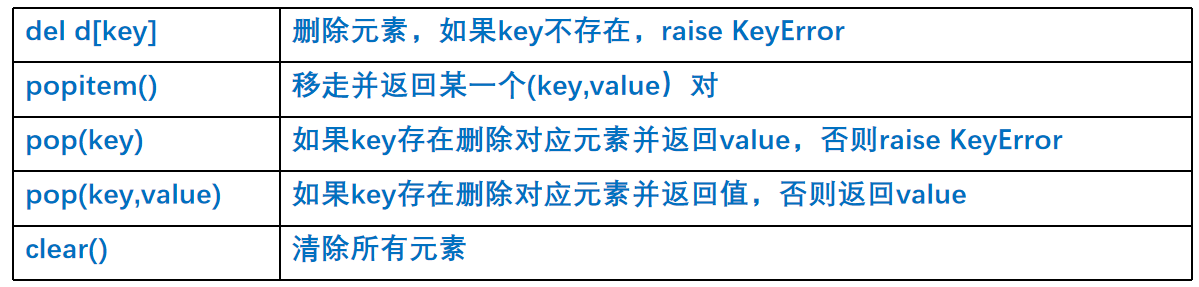

In [28]:
## 常用的字符串统计：输入为string，输出为dict
# 下面的代码首先生成包含1000个随机字符的字符串，然后统计每个字符的出现次数
import string
import random
x = string.ascii_letters + string.digits + string.punctuation
print('\n可使用的字符集:\n', x)
y = [random.choice(x) for i in range(1000)]
z = ''.join(y)
d = dict()
# 遍历生成并且统计数量
for ch in z:
	d[ch] = d.get(ch, 0) + 1  #千万不要使用d[ch] =d[ch] + 1，否则字典没有ch的key，出错
print('\n产生字符串为:\n',z,sep='')
print('\n统计结果为:\n',d,sep='')


可使用的字符集:
 abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

产生字符串为:
$$2#A.Ob6[X&!Vr`1u9EL0NY9!AZiX0tezLxjh6{niFaPhd/woMHM`wKi'82\m>MZ,V!e[G2vL4UJ.qB,Z=tnkfhl1Jn=$IaU='ot$r_}>&RkizX[%/`Se|zu$9=Q7[j~}c(Pl7r3fV]:G#kEWc@!{&k=T'^k2"9y>+GPi#H5=<rii3B=9+{<F!lV!Y8koP-^#D2EV'wk@eW7k]wjjy>hcV!2Std{5pIY#b@#XnG|b=_=Sc2|uX4~j&]fqzT>Qe{HZcrGzH)M)_8(::-h!uk*iRs*>x4D*7n,6V.QJ;\Rj7N*[pg{^0[NgaRX;/;6b_fdq=B=,Crc7RY2uv~'_H|)]gF~y^h8A>OBrX9@^Z%]rE$({dF[\,=V.eFil\Dl&*'7[kbcaFV]A3FF`tzs7xz5B,vO7wjTWCbz]GFK15iG+u~EBviq+lW#[_@x^*j)4H2BB]&.mTLq=|@dT6J4`v=Et)I=wXeFEv|,/bFSXm-;&f7FJGI=P29lE?n.(Tdm$2M3.Ze6k@uOzr%(m,huz+A=w!>gAU/,uTG=,Qor^)%dgHQb5kTk2?-/DZc#z^{uFta$;s&"=bU{`jWmQVLfefdz4%AP41>pFJ4yqm7Xh|X@;c&)g>e-A%9;04!QJ.^DrTc~`kfbs2Fm1C^8p?p!'CO$Xy;!S1.tLHj:s>iW[OkSZ@%od0Wa+;YrJ&Qj'~>%S49t[v]]k*xNq#9.|];Hd['~a3jDz6+MBdazl5K>UhZ-w\Cf(PKyP4Ev4EFWBNZ5$Yp"0zU+J\5hcGnBTQ@VX.$vxTeOkWee%L=b,1pucIC!C1C7,qqWrm_[p<;1'e,JR_wbBjePi&G@8:R5XBcYJT%OWzK%@[ZdYr@8)yoh.vSs=0'aWz4`KkO7

In [34]:
# 应用案例：使用collections模块的defaultdict类（提供缺省值的dict）
# 来实现该功能。
import string
import random
x = string.ascii_letters + string.digits + string.punctuation
y = [random.choice(x) for i in range(1000)]
z = ''.join(y)
from collections import defaultdict
frequences = defaultdict(int)
print(frequences)
for item in z:
    frequences[item] += 1
frequences.items()

defaultdict(<class 'int'>, {})


dict_items([('e', 15), ('u', 7), ('I', 10), ('3', 10), ('0', 9), ('J', 15), ('2', 11), ('4', 10), ('y', 15), ('"', 10), ('d', 11), ('j', 12), (',', 12), ('{', 11), ('!', 13), ('5', 9), ('i', 8), ('V', 12), ('A', 13), ('v', 13), ('S', 12), ('(', 11), ('[', 9), (';', 11), ('6', 18), ('l', 9), ('H', 19), ('c', 12), ('n', 10), ('G', 5), ('h', 14), ('F', 13), ('a', 11), ('*', 7), ('t', 13), ('-', 13), ('Y', 6), ('C', 8), ('9', 11), ('k', 9), ('f', 10), ('o', 15), ('W', 12), ('N', 12), ('m', 12), ('+', 12), ('M', 11), ('_', 14), ('p', 10), ('D', 14), ('q', 9), ('E', 15), ('&', 4), ('g', 14), ('|', 8), ('#', 12), ('%', 9), ('O', 15), (']', 8), ('~', 11), ('/', 11), ("'", 13), (')', 11), ('1', 14), ('z', 12), ('$', 8), ('@', 11), ('w', 11), ('8', 8), ('>', 5), ('L', 12), ('K', 13), ('X', 10), ('?', 10), ('r', 12), (':', 8), ('x', 12), ('^', 10), ('7', 10), ('B', 7), ('<', 7), ('U', 4), ('.', 8), ('`', 16), ('s', 9), ('=', 7), ('Z', 7), ('b', 5), ('Q', 6), ('T', 9), ('P', 11), ('}', 11), ('R', 

In [39]:
### !!!使用collections模块的Counter类可以快速实现字符串统计功能，
# 并且能够满足其他需要，例如查找出现次数最多的元素。
import string
import random
x = string.ascii_letters + string.digits + string.punctuation
y = [random.choice(x) for i in range(1000)]
z = ''.join(y)
from collections import Counter
frequences = Counter(z)
# print(frequences.items())
print(frequences.most_common(1)) # 输出top1
print(frequences.most_common(3)) # 输出top3

[('/', 20)]
[('/', 20), ('W', 19), ('u', 17)]


In [2]:
# 有序字典 , python内置的字典是无序的
import collections
x = collections.OrderedDict()
x['a'] = 3
x['b'] = 5
x['c'] = 8
print(x)

# sorted函数作用于字典只是将key排序后，返回key的列表
d = {'English':136,"math":130,'Chinese':120}
e = sorted(d.items())
print(e)

OrderedDict([('a', 3), ('b', 5), ('c', 8)])
[('Chinese', 120), ('English', 136), ('math', 130)]


In [47]:
# 字典推导式（解析式） 推导式生产dict就酷炫
dict_1 = {k:v for k,v in zip(['a','b','c'],[1,2,3])}
print(dict_1)

dict_2 = {k:v for k,v in [('x',1),('y',2),('z',3)]}
print(dict_2)

{'a': 1, 'b': 2, 'c': 3}
{'x': 1, 'y': 2, 'z': 3}


# 集合(set)
集合是无序可变，使用一对大括号界定，元素间以逗号分隔 
元素无序，且不重复
集合中的元素必须是可hash对象，即不可变对象，不能是可变对象

In [1]:
# 使用大括号创建集合
set1 = {1,2,3,4}
print(set1)

# 使用set()创建set对象
a = set(range(8,14))
print(a)

{1, 2, 3, 4}
{8, 9, 10, 11, 12, 13}


集合的运算:比较运算和内置函数

比较： 
==   != 判断两个集合是否相等
<     > 判断前一集合是否是后者的真子集和真超集
<=  >=判断前一集合是否是后者的子集和超集

元素是否存在： 
x in s  或者 x not in s: 判断元素x是否在集合s中

len(s)：集合的元素个数

max(s)/min(s)/sum(s)：集合中元素最大值、最小值和求和

集合的运算:并，交，差……
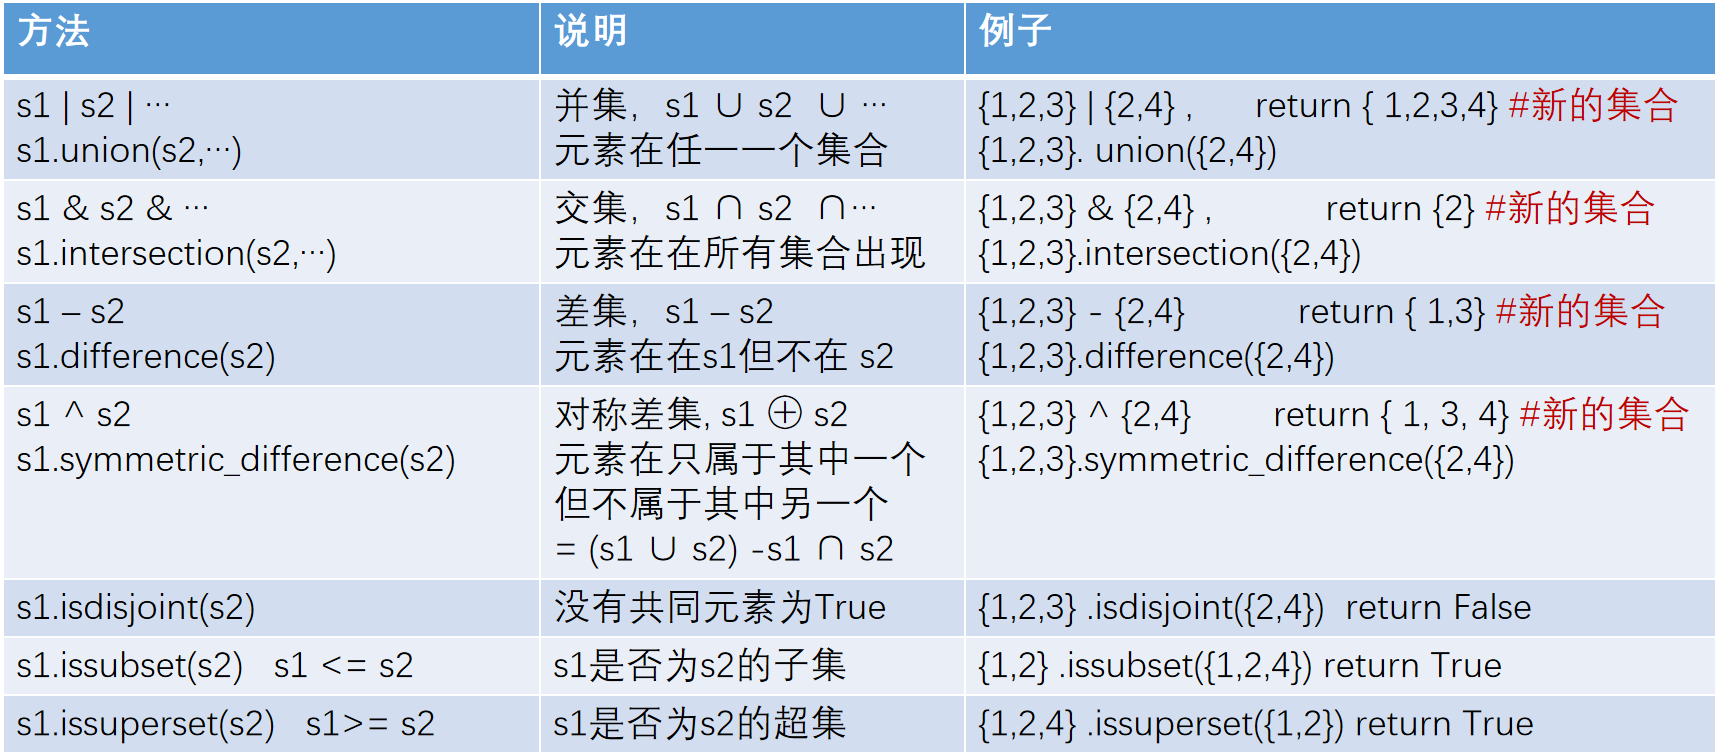

集合元素的更改-原地修改
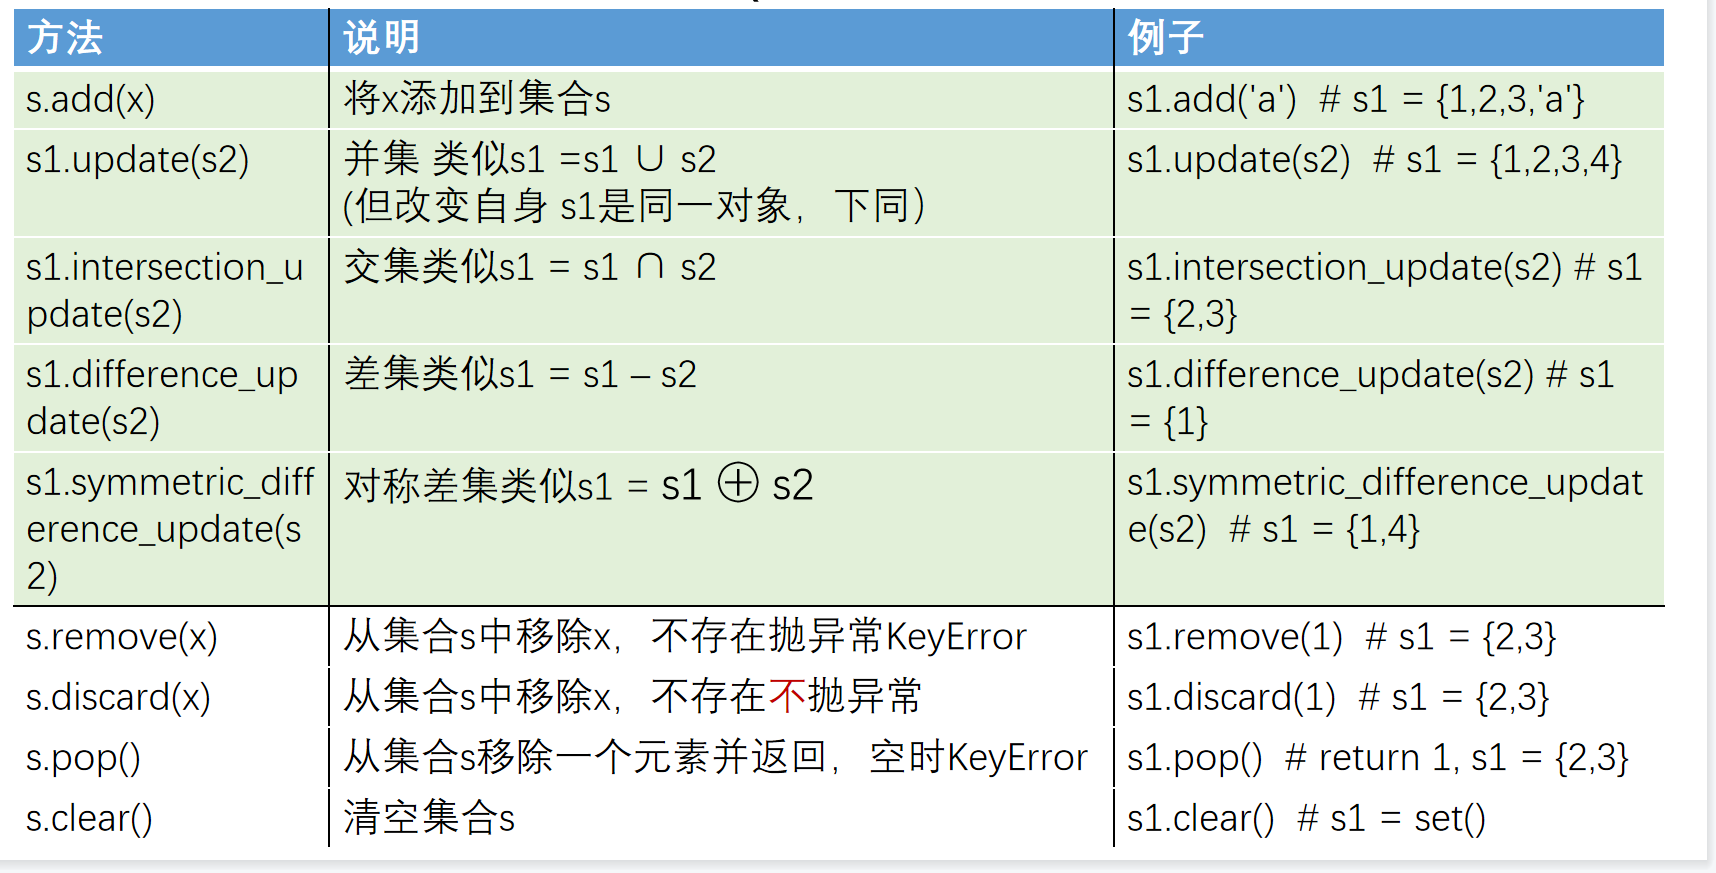

In [2]:
# 集合操作例子:  去除list重复元素
import random
random_list = [random.choice(range(10))for i in range(100)] 
print(random_list)

# 方法一
def way1(random_list):
    noRepeat = []
    for i in random_list:
        if i not in noRepeat:
            noRepeat.append(i)
    print(noRepeat)
    return noRepeat
    
# 方法二
def way2(random_list):
    noRepeat = []
    [noRepeat.append(i)for i in random_list if not i in noRepeat]
    print(noRepeat)
    return noRepeat
    
# 方法三
def way3(random_list):
    new_set = set(random_list)
    noRepeat = list(new_set)
    print(noRepeat)
    return noRepeat

# 方法四
def way4(random_list):
    new_dict = dict.fromkeys(random_list)
    noRepeat = list(new_dict.keys())
    print(noRepeat)
    return noRepeat

#  以上方法利用set和dict的key的不重复特性去除重复元素，但是无序特性导致产生的list不是按照原来的顺序
# 利用sort或sorted方法的参数key来恢复原来的（下标）顺序
def way5(random_list):b
    new_set = set(random_list)
    noRepeat = list(new_set)
    noRepeat.sort(key=random_list.index)
    new_list = sorted(noRepeat,key=random_list.index)
    print(new_list)

noRepeat = way1(random_list)
way2(random_list)
way3(random_list)
way4(random_list)
way5(noRepeat)

[5, 4, 9, 0, 6, 4, 2, 3, 4, 2, 8, 8, 9, 7, 4, 3, 1, 8, 5, 6, 1, 0, 9, 2, 5, 6, 3, 3, 9, 6, 4, 6, 2, 6, 7, 1, 6, 5, 1, 0, 6, 6, 3, 6, 5, 0, 9, 7, 4, 5, 0, 5, 6, 9, 7, 7, 2, 6, 4, 4, 3, 1, 6, 3, 3, 1, 4, 1, 3, 2, 4, 3, 4, 1, 0, 6, 3, 8, 8, 8, 0, 9, 1, 0, 4, 6, 8, 9, 1, 5, 5, 7, 5, 7, 8, 7, 5, 8, 5, 5]
[5, 4, 9, 0, 6, 2, 3, 8, 7, 1]
[5, 4, 9, 0, 6, 2, 3, 8, 7, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 4, 9, 0, 6, 2, 3, 8, 7, 1]
[5, 4, 9, 0, 6, 2, 3, 8, 7, 1]


In [4]:
# set推导式（解析式）
a_set = {2*x for x in range(5)}
print(a_set)

{0, 2, 4, 6, 8}


In [6]:
# 不可变集合frozenset
set1 = frozenset(range(10))
print(set1) # 除了不可以更改其他和set一致

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})


# 字符串专题

## 字符串基础

单引号和双引号定义的字符串不能跨越多行，字符串中想要有换行需要使用字符转义

三引号'''或"""表示的字符串可以换行，用于长字符串，也用于在程序中表示较长的注释。

空串表示为''或 ""
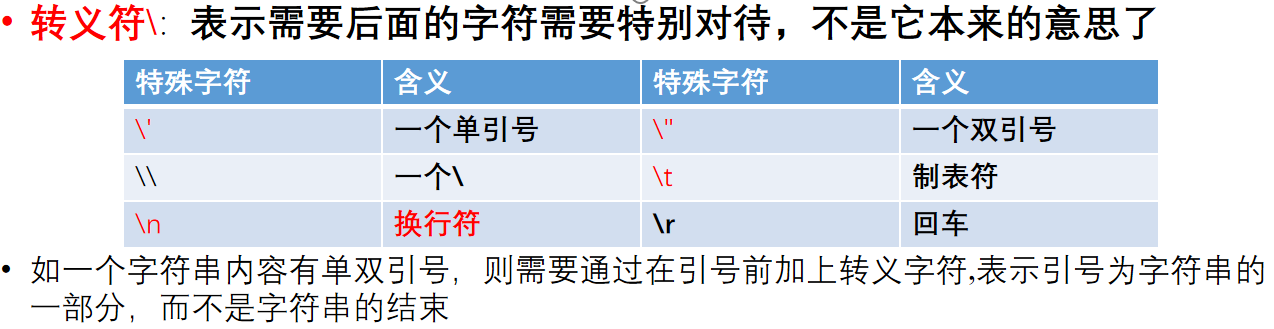

In [3]:
'''字符串界定符前面加字母r或R表示原始字符串
表示字符串里面的\都不起作用了，即其中的特殊字符不进行转义，
但字符串的最后一个字符不能是\ '''
a = r"D:\kwCodes\chengfei\new_data"
print(a)
print(repr(a)) # repr(obj) 内部表示字符串

D:\kwCodes\chengfei\new_data
'D:\\kwCodes\\chengfei\\new_data'


In [4]:
# 判断一个变量s是否为字符串：使用内置函数isinstance(s,str)
s = r'our enermy has been slave'
print(isinstance(s,str))

True


字符串属于不可变序列类型（通用序列方法）:

    支持序列通用方法，包括下标和切片访问、成员关系、比较运算以及求字符串长度、最大值、最小值等
    作为iterable对象，当然也支持sorted/reversed/ enumerate/zip等内置函数
    
字符串属于不可变序列，不能直接对字符串对象进行元素增加、修改与删除等操作，切片操作也只能访问其中的元素而无法使用切片来修改字符串中的字符。

In [7]:
# 字符串的合并：生成新字符串
a = 'abc'
b = 'defghijkl'
c = a+b
print(c)

# 字符串和整数相乘相当于字符串的内容重复多次
# 整数小于等于0时生成空字符串 ''
e = '-'*30
f = 4* 'NE'
print(e,' ',f)

abcdefghijkl
------------------------------   NENENENE


In [8]:
'''python2 常用：（python3兼容）
format_string % obj  把对象obj按格式要求format_string转换为字符串。 
如果格式化字符串中有多个占位符，则obj应该是元组tuple对象，
格式为(obj1,obj2…,objN)'''
print("Hi %s,your score is %d" % ('Bart',59))

Hi Bart,your score is 59


In [12]:
x = 1235
print('%d'% x)
print('%#o'% x)
print('%04x'% x)
print('%e'% x)
print('%-6.2f'% 3.1415)
print('%s'% 65)
print('%10s'% 65)
print('%s' % 655333)

1235
0o2323
04d3
1.235000e+03
3.14  
65
        65
655333


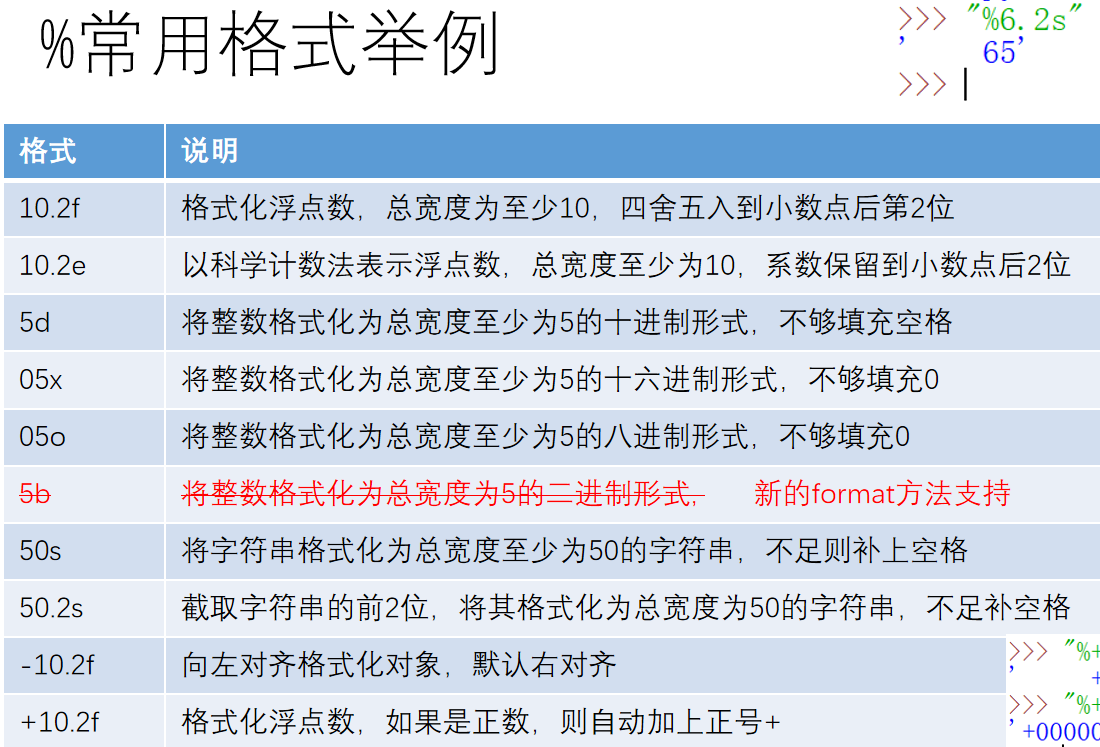

In [18]:
# python3 引入：format_string.format(*args, **kwargs) 
print("The number {0:,} in hex is: {0:#x}, the number {1} in oct is {1:#o}".format(5555, 55))
print()
print("The number {1:,} in hex is: {1:#x}, the number {0} in oct is {0:#o}".format(5555, 55))
print()
print("my name is {name}, my age is {age}, and my QQ is {qq}".format(name = "Dong Fuguo",age = 37,qq = "306467355"))
print()
position = (5,8,13)
print("X:{0[0]};Y:{0[1]};Z:{0[2]}".format(position))

The number 5,555 in hex is: 0x15b3, the number 55 in oct is 0o67

The number 55 in hex is: 0x37, the number 5555 in oct is 0o12663

my name is Dong Fuguo, my age is 37, and my QQ is 306467355

X:5;Y:8;Z:13


In [22]:
weather = [('monday','rain'),('Tuesday','sunny'),('Wednesday','sunny'),
           ('Thursday','rain'),('Friday','Cloudy')]
formatter = "Weather of '{0[0]}' is '{0[1]}'".format

for item in weather:
    print(formatter(item))

print()

for item in map(formatter,weather):
    print(item)

Weather of 'monday' is 'rain'
Weather of 'Tuesday' is 'sunny'
Weather of 'Wednesday' is 'sunny'
Weather of 'Thursday' is 'rain'
Weather of 'Friday' is 'Cloudy'

Weather of 'monday' is 'rain'
Weather of 'Tuesday' is 'sunny'
Weather of 'Wednesday' is 'sunny'
Weather of 'Thursday' is 'rain'
Weather of 'Friday' is 'Cloudy'


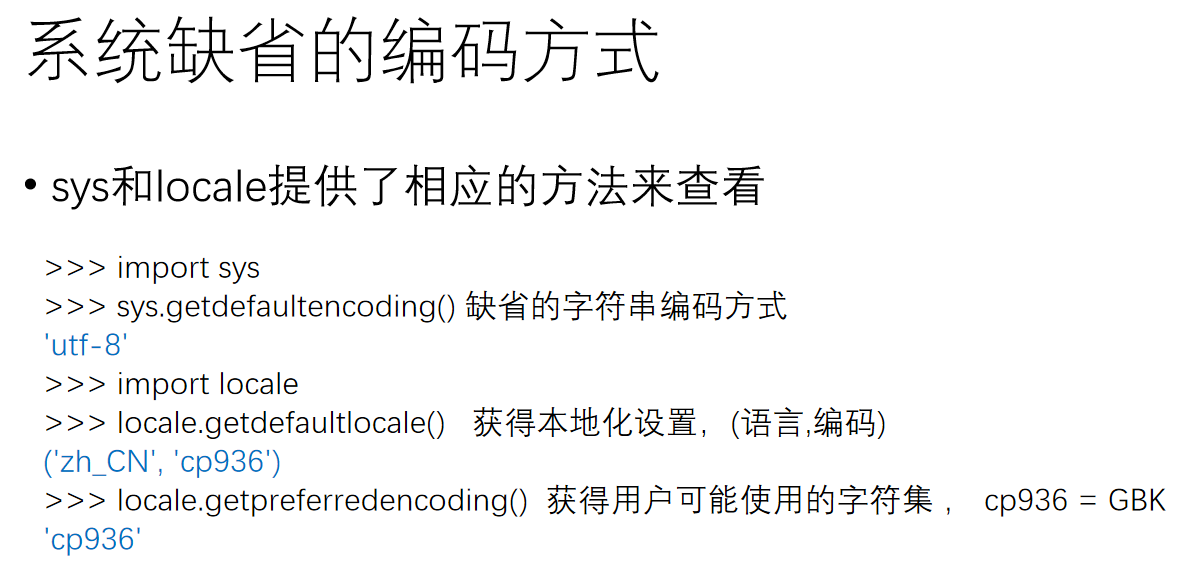

In [27]:
import sys
print(sys.getdefaultencoding())

import locale
print(locale.getdefaultlocale())
print(locale.getpreferredencoding())

utf-8
('zh_CN', 'cp936')
cp936


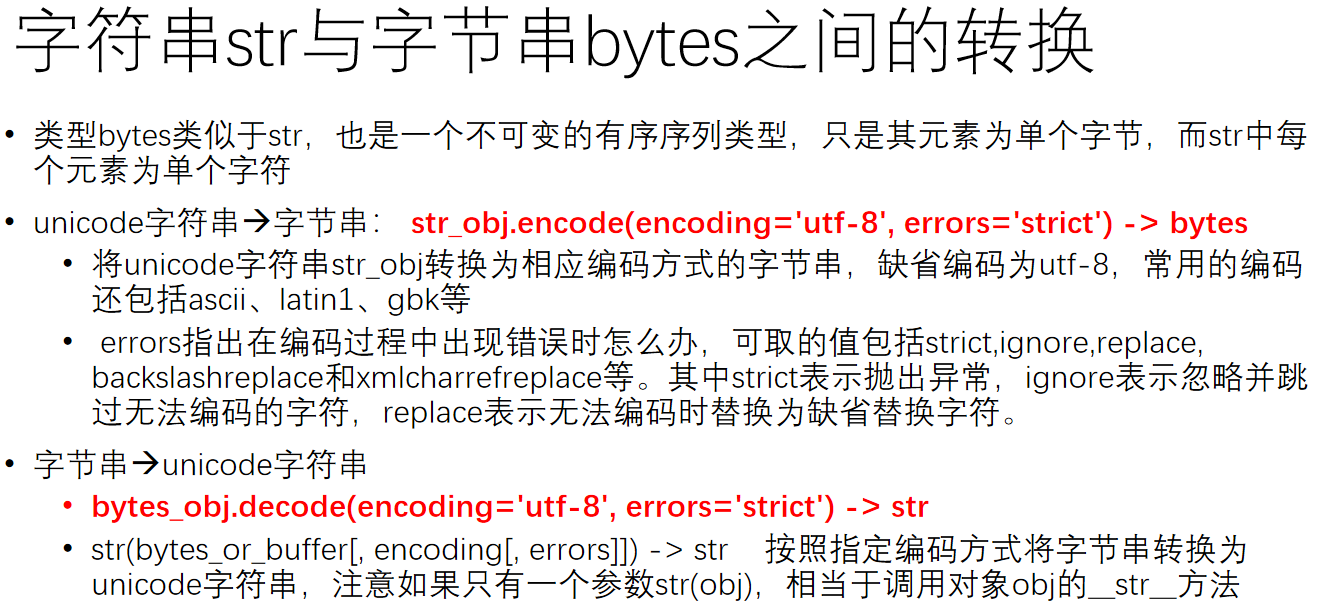
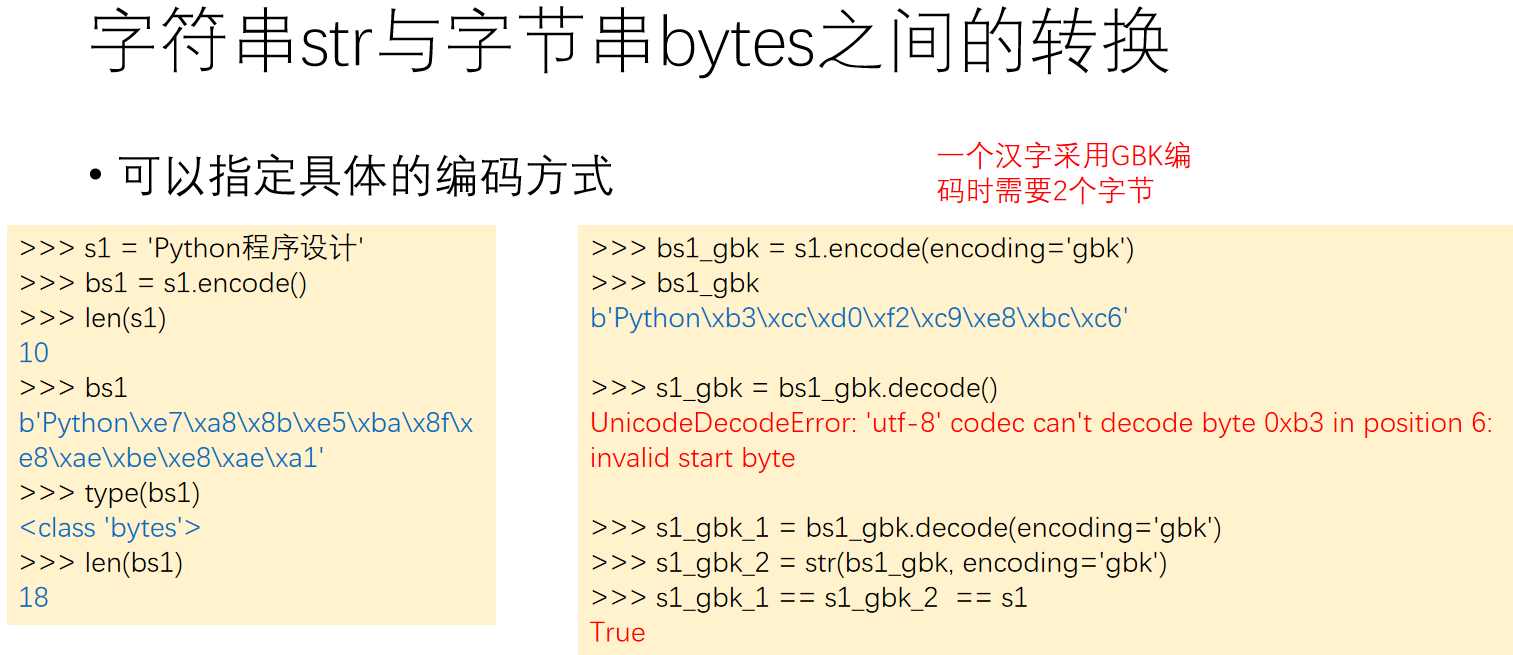

## 字符串方法⭐

去两端空白字符 ： strip([chars]) lstrip([chars]) rstrip([chars])

    将字符串的两端、左端或者右端的空格去掉后返回一个新的字符串。如果指定了chars，则为去掉字符串两端、右端或左端开始处chars中的那些字符。

In [4]:
# 去除空格
s = ' abc '
s1 = s.strip()
print(s1
     )
s2 = s.lstrip()
print(s2)
s3 = s.rstrip()
print(s3,'\n')

# 去除字符
print("aaaassddf".strip('a'))
print("aaaassddf".strip('asf'))
print("aaaassddfaaa".rstrip('a'))
print("aaaassddfaaa".lstrip('a'))

abc
abc 
 abc 

ssddf
dd
aaaassddf
ssddfaaa


### 字符串类型判断

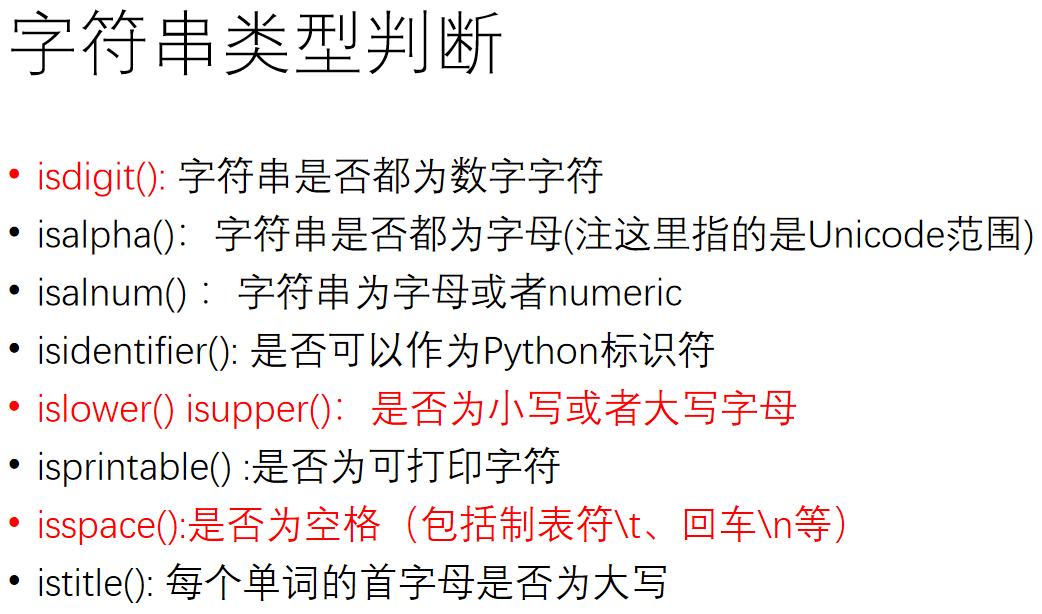

In [6]:
print('abcd'.isalpha())
print('1234'.isalpha())
print('一千三百'.isalpha())
print('1234abcDE'.isalnum())
print( '中国一千三百'.isidentifier())
print('1234abcDE'.isidentifier())
print('1234abcDE'.islower())
print('abcde'.islower())
print('ABCDE'.isupper())
print(' \t\n'.isspace())
print('How Are You?'.istitle())

True
False
True
True
True
False
False
True
True
True
True


### 大小写转换

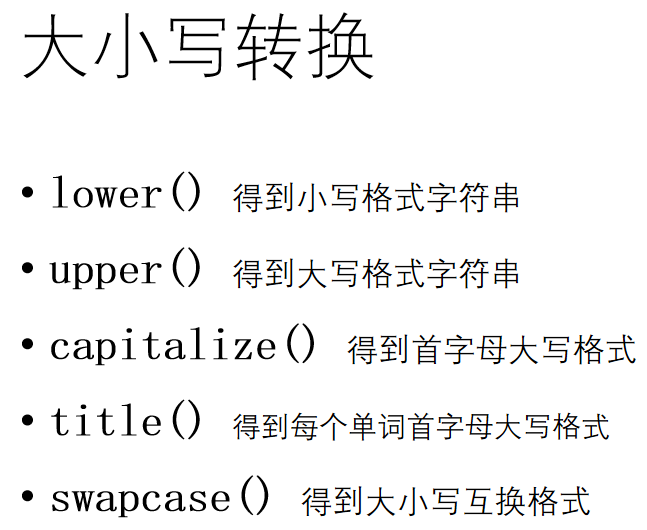

In [11]:
s="What is YoUr NaMe?"
print(s.lower())
print(s.upper())
print(s.capitalize())
print(s.title())
print(s.swapcase())

what is your name?
WHAT IS YOUR NAME?
What is your name?
What Is Your Name?
wHAT IS yOuR nAmE?


### 字符串常量：string模块

In [17]:
import string
# dir(string)
print('digits: ',string.digits)
print('punctuation: ',string.punctuation)
print('ascii_letters: ',string.ascii_letters)
print('printable: {}'.format(string.printable))
print('ascii_lowercase: ',string.ascii_lowercase)
print('ascii_uppercase: ',string.ascii_uppercase)

digits:  0123456789
punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
ascii_letters:  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
printable: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

ascii_lowercase:  abcdefghijklmnopqrstuvwxyz
ascii_uppercase:  ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [18]:
'''practice1 : 删除字符串中的非字母和非数字的符号'''
import string
s = 'asgd6^&%&Yg91289hj6877*^*&*214'
charSet = string.ascii_letters \ # 换行添加 \  
        + string.digits
t = ""
for x in s:
    if x in charSet:
        t = t + x
print(t)

asgd6Yg91289hj6877214


In [24]:
'''practice2 : 自己实现大小写转换'''
def swap_case(ch):
    if 'a' <= ch <= 'z':
        return chr(ord(ch) - ord('a') + ord('A'))
    if 'A' <= ch <= 'Z':
        return chr(ord(ch) - ord('A') + ord('a'))
    return ch

import string
def swap_case_2(ch):
    if ch in string.ascii_lowercase:
        return chr(ord(ch) - ord('a') + ord('A'))
    if ch in string.ascii_uppercase:
        return chr(ord(ch) - ord('A') + ord('a'))
    return ch

print(swap_case('s'))
print(swap_case_2('f'))

S
F


In [25]:
'''practice3 : 统计文章的单词个数。约定单词由英文字母组成，其他字符只是用来分隔单词'''
import string
def count_words(sentence='If winter comes, can spring be far behind?'):
    words = 0 
    inword = False
    for c in sentence:
        if inword:
            if c not in string.ascii_letters:
                inword = False
        else:
            if c in string.ascii_letters:
                inword = True
                words += 1
    return words

def test_count_words(): 
    s = input('请输入多个英文单词，可以用任何非英文字母分割单词\n')
    words = count_words(s)
    print('英文单词个数:%d' % words)

查找: startswith endswith

startswith(prefix[,start[,end]])      endswith(suffix[,start[,end]]) 
    
    是否以prefix开头或者suffix结尾
    prefix和suffix可以是字符串; 也可以是多个字符串（tuple）,表示其中任意一个字符串开头或者结尾

In [28]:
import os
'''打印当前文件夹下所有以.exe和.bat结尾的文件名'''
print([filename for filename in os.listdir(r'c:\windows') if filename.endswith(('.exe','.bat'))])

['bfsvc.exe', 'explorer.exe', 'HelpPane.exe', 'hh.exe', 'notepad.exe', 'py.exe', 'pyw.exe', 'regedit.exe', 'splwow64.exe', 'winhlp32.exe', 'write.exe']


### 成员判断和查找

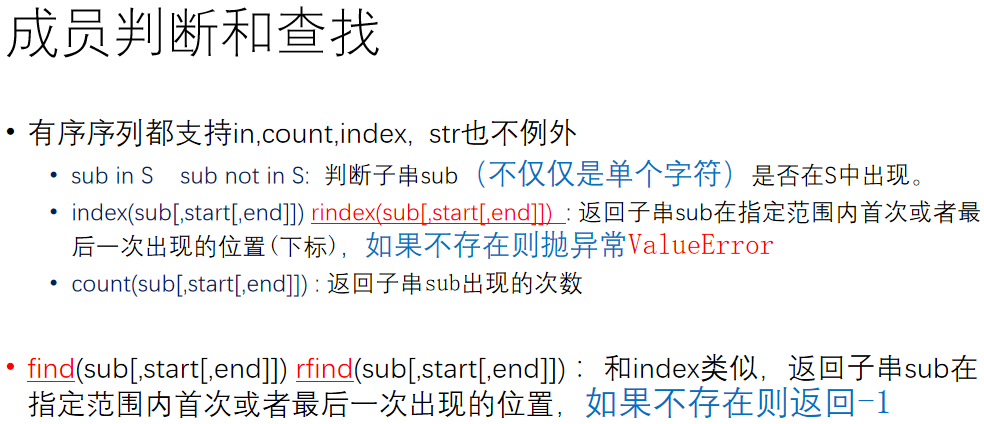

In [30]:
s = "apple,peach,banana,peach,pear"
print('c' in s)
print('pear' in s)
print('t' not in s)
print(s.index('peach'))
print(s.rindex('peach'))
print(s.count('p'))
print(s.count('pp'))
print(s.count('ppp'))
print(s.find('peach'))
print(s.find('peach',7))
print(s.find('peach',7,20))
print(s.rfind('p'))
print(s.rfind('ppp'))

True
True
True
6
19
5
1
0
6
19
-1
25
-1


### 字符串替换

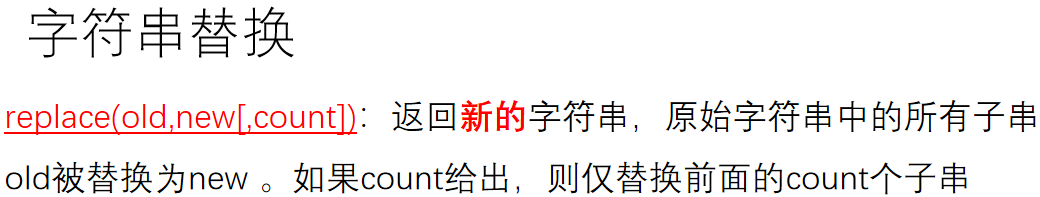

In [32]:
s = "apple,peach,banana,peach,pear"
print(s.replace('peach','PEACH'))
print(s.replace('peach','PEACH',1))
print(s.replace('peach','LEMON'))

apple,PEACH,banana,PEACH,pear
apple,PEACH,banana,peach,pear
apple,LEMON,banana,LEMON,pear


分割和组合:

    split(sep=None,maxsplit=-1) rsplit(sep=None, maxsplit=-1)
    partition(sep) rpartition(sep) 
    splitlines([keepends]) 
    join(iterable)

### 分割和组合

In [34]:
s="  apple , peach , banana,,peach ,pear ,"
print(s.split(','))
print([i.strip() for i in s.split(',')])
print([i.strip() for i in s.split(',') if i != ''])
print(s.split(',',2))
print(s.split('peach'))

t= "2014-10-31".split("-")
print(t)
print([int(c) for c in t])

s2 = '\nHello world \n\n My  name is Mike   '
print(s2.split())
print(s2.split(' '))

['  apple ', ' peach ', ' banana', '', 'peach ', 'pear ', '']
['apple', 'peach', 'banana', '', 'peach', 'pear', '']
['apple', 'peach', 'banana', 'peach', 'pear']
['  apple ', ' peach ', ' banana,,peach ,pear ,']
['  apple , ', ' , banana,,', ' ,pear ,']
['2014', '10', '31']
[2014, 10, 31]
['Hello', 'world', 'My', 'name', 'is', 'Mike']
['\nHello', 'world', '\n\n', 'My', '', 'name', 'is', 'Mike', '', '', '']


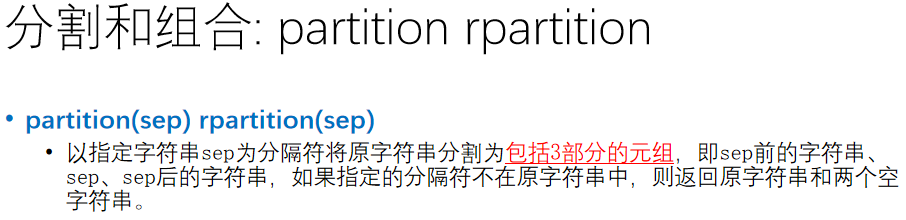

In [36]:
s="  apple , peach , banana,,peach ,pear ,"

print(s.partition(','))
print(s.rpartition(','))
print(s.rpartition('banana'))

('  apple ', ',', ' peach , banana,,peach ,pear ,')
('  apple , peach , banana,,peach ,pear ', ',', '')
('  apple , peach , ', 'banana', ',,peach ,pear ,')


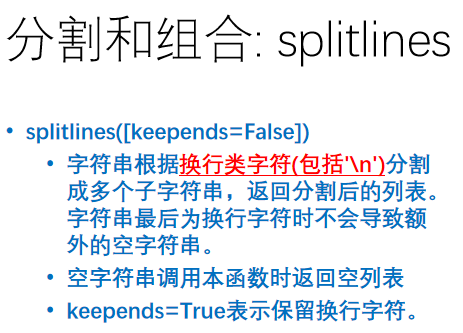

In [37]:
s3 = '\nab c\n\nde fgkl\n'

print(s3.splitlines())
print(s3.splitlines(keepends=True))
print(s3.split('\n'))
print(s3.split())
print(''.split('\n'))
print(''.splitlines())

['', 'ab c', '', 'de fgkl']
['\n', 'ab c\n', '\n', 'de fgkl\n']
['', 'ab c', '', 'de fgkl', '']
['ab', 'c', 'de', 'fgkl']
['']
[]


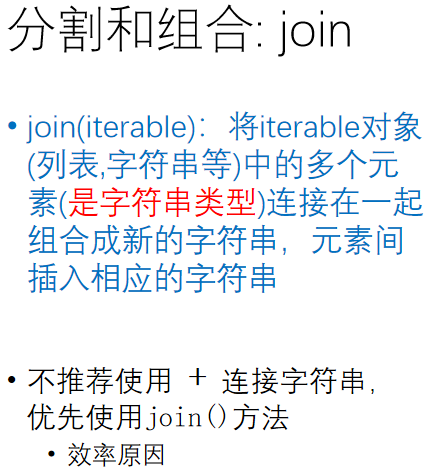

In [39]:
list1=["apple", "peach", "banana","pear"]
print(''.join(list1))

list2 = list(range(5))
print(list2)
print('+'.join(map(str,list2)))
print('+'.join([str(i)for i in list2]))

s4 = 'notice'
print(' '.join(s4.upper()))

applepeachbananapear
[0, 1, 2, 3, 4]
0+1+2+3+4
0+1+2+3+4
N O T I C E


### 展示

In [43]:
s='Hello world!'

print(s.center(20))
print(s.center(20,'='))
print(s.ljust(20,'='))
print(s.rjust(20,'='))
print()
print('1\t2\t3'.expandtabs())
print('1\t2\t3'.expandtabs(2))

    Hello world!    
====Hello world!====
Hello world!========
========Hello world!

1       2       3
1 2 3


In [44]:
# 例子：图形打印
lines = int(input('请输入n：'))
for i in range(lines):
    stars = ' '.join('*'*(i+1))
    print(stars)

请输入n：3
*
* *
* * *


In [45]:
# 例子：图形打印靠右对齐
lines = int(input('请输入n：'))
for i in range(lines):
    stars = ' '.join('*'*(i+1))
    line = stars.rjust(lines*2-1,' ')
    print(line)

请输入n：3
    *
  * *
* * *


### 字符串转换

In [53]:
s = 'Great hopes make great man.'
tab = str.maketrans('abcde','uvwxy')
print(tab)
ss = s.translate(tab)
print('ss : ',ss)
print()
tabb = str.maketrans('uvwxy','abcde')
print(tabb)
print('ss : ',ss.translate(tabb))

{97: 117, 98: 118, 99: 119, 100: 120, 101: 121}
ss :  Gryut hopys muky gryut mun.

{117: 97, 118: 98, 119: 99, 120: 100, 121: 101}
ss :  Great hopes make great man.


In [60]:
s1 = '我的银行账号为3141516,密码为123456'
tab1 = str.maketrans('账号密码','九八姑婆','123456789')
print(tab1)
print()
s11 = s1.translate(tab1)
print(s11,'\n')

tab2 = str.maketrans('123456789','*'*9)
print(tab2)
print(s1.translate(tab2),'\n')

s2 = 'dlmao@fudan.edu.cn'
tab3 = str.maketrans({'@':' AT ', '.':' DOT '})
print(tab3)
print(s2.translate(tab3))

{36134: 20061, 21495: 20843, 23494: 22993, 30721: 23110, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None}

我的银行九八为,姑婆为 

{49: 42, 50: 42, 51: 42, 52: 42, 53: 42, 54: 42, 55: 42, 56: 42, 57: 42}
我的银行账号为*******,密码为****** 

{64: ' AT ', 46: ' DOT '}
dlmao AT fudan DOT edu DOT cn


In [64]:
# eval实例
print(eval('3+4'))
a = 3;b = 5
print(eval('a+b'))
eval('print("a + b = ",a+b)') # 只能是表达式，不能是语句 如 eval('c = a + b')
print()

import math
print(eval('math.sqrt(3)'))

7
8
a + b =  8

1.7320508075688772


In [69]:
cmd = "__import__('os').startfile(r'C:\\Windows\\notepad.exe')"
eval(cmd)

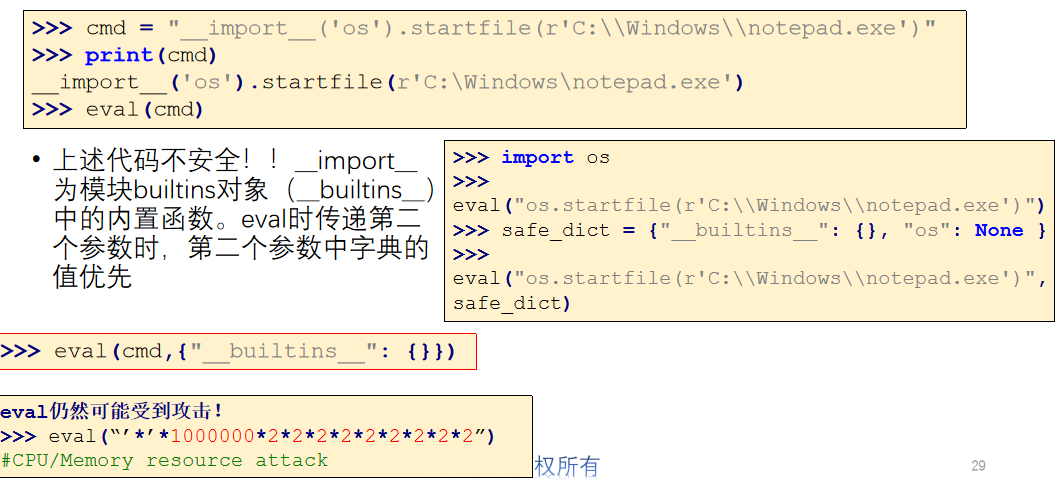

In [73]:
# 建议使用ast模块
'''import ast
ast.literal_eval(cmd)'''

import os
import traceback
import ast
def test_eval():
    cmd = "__import__('os').startfile(r'C:\\Windows\\notepad.exe')"
    input('eval %s...'% cmd) 
    eval(cmd)
    cmd2 = "os.startfile(r'C:\\Windows\\notepad.exe')"
    input('eval %s...'% cmd2) 
    eval(cmd2)
    try: 
        safe_dict = {"__builtins__": {}, "os": None }
        input('eval with safe_dict...') 
        eval(cmd2,safe_dict)
    except :
        traceback.print_exc() 
    try: 
        input('ast.literal_eval %s...' % cmd2)         
        ast.literal_eval( cmd )
    except :
        traceback.print_exc()

# 二维矩阵

python中常用list的list表示二维矩阵matrix, matrix的元素为数组的行列表，行列表中的元素为该行的各列

二维矩阵的值可以通过行下标和列下标来访问，matrix[i][j]表示第i+1行和第j+1列的数据
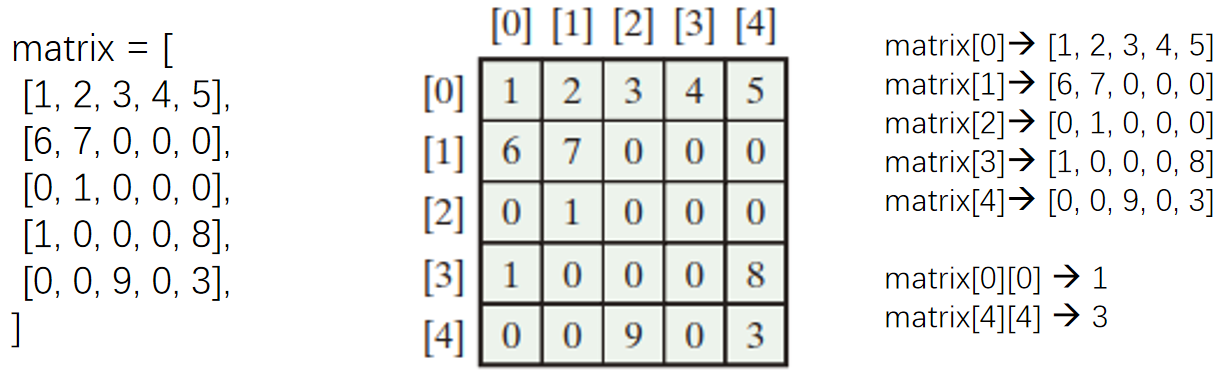

In [134]:
# 二维矩阵的生成
import random 
def generate_random_matrix(rows = 3,cols = 3):
    matrix = []
    for row in range(rows):
        matrix.append([])
        for column in range(cols):
            matrix[row].append(random.randint(0,10))
    return matrix

# 二维矩阵的访问
def print_matrix(matrix):
    for row in matrix:
        for value in row:
            print(value,end = ' ')
        print()

def print_matrix_2(matrix): # 通过下标访问
    for row in range(len(matrix)):
        for column in range(len(matrix[row])):
            print(matrix[row][column],end = ' ')
        print()

m = generate_random_matrix()
print_matrix(m)
print()
print_matrix_2(m)

10 0 2 
8 2 9 
9 2 4 

10 0 2 
8 2 9 
9 2 4 


# 程序结构设计

## 异常处理结构

In [87]:
# 遇到bug就把它try掉
try:
    # 执行代码块
except TypeError as e:
    # 异常处理
except (IndexError, ValueError):
    # 异常处理

关系运算符：>、<、==、<=、>=、!=，可以连续使用，连续使用时表示这些条件都满足(AND)
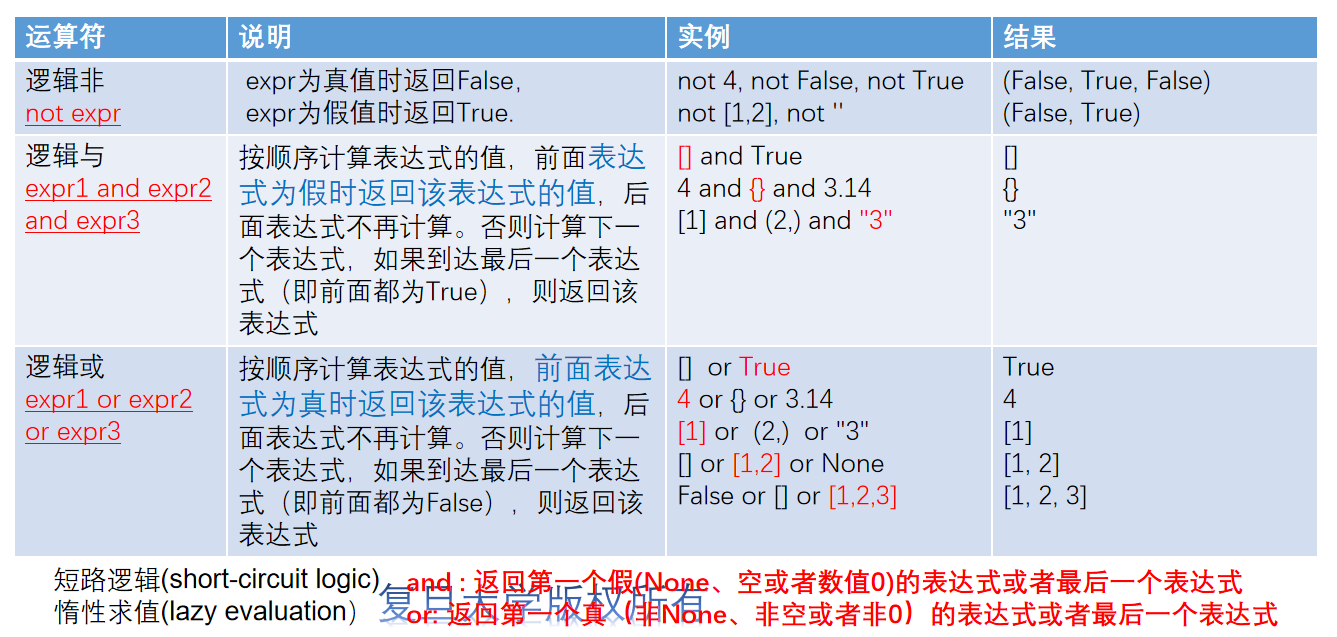

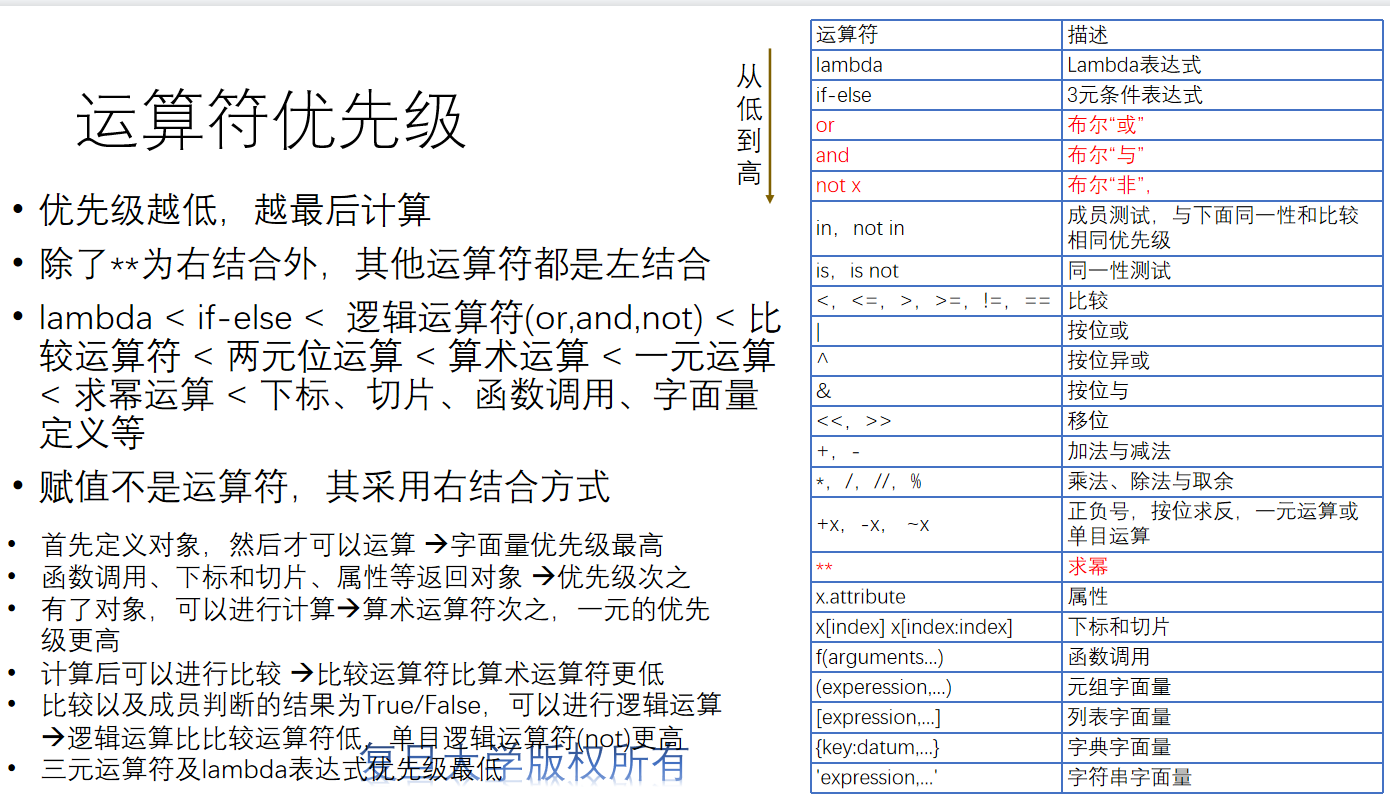

短路逻辑:and和or在前面的表达式真值判断时就已确定最终结果时后面的表达式不会再计算


In [31]:
# any(iterable): iterable中任一元素的真值为真时返回True，都为假返回False。长度为0时返回False
print(any([1,0,0]))
print(any([0,0,0]),'\n')

# all(iterable): iterable中所有元素都为真时返回True，否则任一元素为假返回False。长度为0时返回True
print(all([1,0,0]))
print(all([1,2,3]))

True
False 

False
True


In [34]:
# if else 三元表达式 ： 
# value1 if condition else value2-短路计算，并不会同时对value1 和value2 求值。
a = 5
print(6) if a>3 else print(5)
print(6 if a>3 else 5)
print()

b = 6 if a>13 else 9 
print(b)

import math 
a = 2
x = math.sqrt(9) if a>3 else random.randint(1,100)
print(x)

6
6

9
17


python 用 elif 代替 else if 
实际上elif就是else if缩写

In [37]:
# 时间模块
import time
print(time.time())
print(time.localtime())
print(time.asctime(time.localtime()))

1619242006.9967778
time.struct_time(tm_year=2021, tm_mon=4, tm_mday=24, tm_hour=13, tm_min=26, tm_sec=46, tm_wday=5, tm_yday=114, tm_isdst=0)
Sat Apr 24 13:26:46 2021


## 循环

### for循环 - 一般用于循环次数可以提前确定的情况，尤其是用于 枚举 序列等迭代对象或迭代器中的元素 
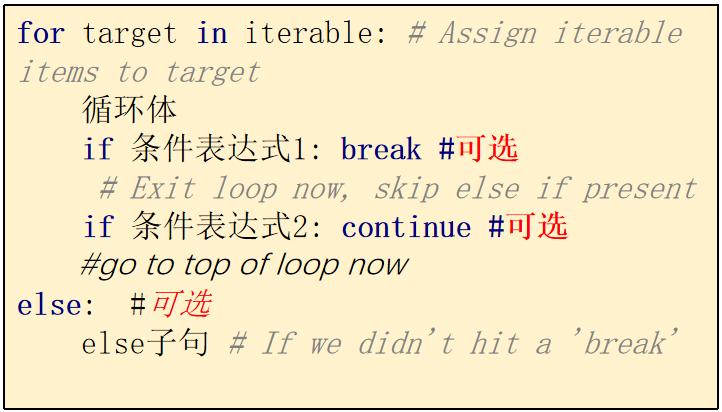
循环次数确定的情况下优先考虑用for

蒙特卡洛模拟计算pi

蒙特卡罗方法：如图所示，圆的面积为pi，而正方形的面积为4,在正方形的区域随机产生一个点，该点在圆内的概率为pi/4。


In [29]:
# 蒙特卡罗方法：frequency = hits/tries = pi/4  pi = 4*hits/tries
import random
def montecario_pi(tries = 1000000):
    hits = 0
    for i in range(tries):
        x = random.random()*2 - 1
        y = random.random()*2 - 1
        
        if x * x + y * y <= 1:
            hits += 1
    pi = 4 * hits / tries
    return pi
print(montecario_pi())

3.144204


In [52]:
# 例子 ： 九九乘法表
def print_multi_table():
    for i in range(1,10):
        for j in range(1,i+1):
            print(i,'*',j,'=',i*j,' ',end = '')
        print()
print_multi_table()

1 * 1 = 1  
2 * 1 = 2  2 * 2 = 4  
3 * 1 = 3  3 * 2 = 6  3 * 3 = 9  
4 * 1 = 4  4 * 2 = 8  4 * 3 = 12  4 * 4 = 16  
5 * 1 = 5  5 * 2 = 10  5 * 3 = 15  5 * 4 = 20  5 * 5 = 25  
6 * 1 = 6  6 * 2 = 12  6 * 3 = 18  6 * 4 = 24  6 * 5 = 30  6 * 6 = 36  
7 * 1 = 7  7 * 2 = 14  7 * 3 = 21  7 * 4 = 28  7 * 5 = 35  7 * 6 = 42  7 * 7 = 49  
8 * 1 = 8  8 * 2 = 16  8 * 3 = 24  8 * 4 = 32  8 * 5 = 40  8 * 6 = 48  8 * 7 = 56  8 * 8 = 64  
9 * 1 = 9  9 * 2 = 18  9 * 3 = 27  9 * 4 = 36  9 * 5 = 45  9 * 6 = 54  9 * 7 = 63  9 * 8 = 72  9 * 9 = 81  


In [59]:
# 例子 : 水仙花数
def find_narcissi_few():
    result = [i for i in range(100,1000)
              if (i%10)**3 + (i//10%10)**3+(i//100)**3==i]
    print('三位水仙花数:',*result)

find_narcissi_few()

三位水仙花数: 153 370 371 407


In [85]:
# 补充知识点：在Python的在形参前加'*'和'**'表示动态形参
# 在形参前加'*'表示可以接受多个实参值存进数组
def F(a,*b):
    print(a)
    print(b)
    print()
    
F(1,2,3)

# 对于在形参前加'**'表示表示接受参数转化为字典类型
def F1(**a):
    print(a)
    print()
    
F1(x=1,y=2)

# 混合使用
def F2(a,*b,**c):
    print('F2 :')
    print(a)
    print(b)
    print(c)
    print()
F2(1,2,3,x=4,y=5)

ls = [1,2,3]
def F3(*a):
    print('F3 :')
    print(a)
F3(ls)# 将列表作为一个元素传入
F3(*ls)# 将列表元素作为多个元素传入
print()

dt = dict(x=1,y=2)
F1(**dt)
F1(x=1,y=2)

1
(2, 3)

{'x': 1, 'y': 2}

F2 :
1
(2, 3)
{'x': 4, 'y': 5}

F3 :
([1, 2, 3],)
F3 :
(1, 2, 3)

{'x': 1, 'y': 2}

{'x': 1, 'y': 2}



### while循环一般用于循环次数难以提前确定的情况，也可以用于循环次数确定的情况


while循环和for循环都可以带else子句，当循环自然结束时（不是因为执行了break而结束）执行else结构中的语句

In [89]:
# 例子 ： 计算 0!+1!+2！+...+20！
def sun_factorial(n):
    i = item = 1
    result = 1
    while i <=n:
        item *= i
        result += item
        i += 1
    return result
print(sun_factorial(20))

2561327494111820314


### break与continue
break语句在while循环和for循环中都可以使用，一般放在if选择结构中，一旦break语句被执行，将使得当前整个循环提前结束。

continue语句的作用是终止当前循环，并忽略continue之后的语句，然后回到循环的顶端，提前进入下一次循环。

In [90]:
list = []
for i in range(10):
    if i % 2 ==0:
        list.append(i)
    else:
        continue
    if i == 9:
        break
print(list)

[0, 2, 4, 6, 8]


### 循环结构优化
编写循环语句时，应尽量减少循环内部不必要的计算，将与循环变量无关的代码尽可能地提取到循环之外。

使用多重循环嵌套时，应尽量减少内层循环中不必要的计算，尽可能地向外提。

In [125]:
'''版本一'''
import time
# 编写程序，输出由digits的数字组成的每位数都不相同的所有数
def three_numbers_raw():
    digits = [i for i in range(100)] 
    list = []
    for i in digits:
        for j in digits:
            for k in digits:
                if i!=j and j!=k and i!=k:
                    list.append(i*100+j*10+k)
                    
# 优化：数组改成tuple，并且部分判断提到外层循环，减少循环次数
def three_numbers_optimize():
    digits = (i for i in range(500)) # 由于这个太快，故将tuple的数字调大一些才可以
    list = []
    for i in digits:
        for j in digits:
            if i == j : continue
            for k in digits:
                if j!=k and i!=k:
                    list.append(i*100+j*10+k)

start_time = time.time()
three_numbers_raw()
exec_time = time.time() - start_time
print('Time Used:',exec_time)

start_time_1 = time.time()
three_numbers_optimize()
exec_time_1 = time.time() - start_time_1
print('Time Used:',exec_time_1)
'''从结果可以看出运行速度快很多,其实从循环中提出来只快了大概0.06s，
但是把list改成tuple之后，就快了非常非常多'''

Time Used: 0.34303784370422363
Time Used: 0.0009996891021728516


'从结果可以看出运行速度快很多,其实从循环中提出来只快了大概0.06s，\n但是把list改成tuple之后，就快了非常非常多'

In [126]:
'''版本二  ： 一个三位数，由从1、2、3、4选择的数字组成，且三位数的数字允许重复，请输出这些三位数'''
import time
start = time.time()
digits = (1,2,3,4)
for i in range(1000): # 重复一千次，计时有效
    result = []
    for i in digits:
        for j in digits:
            for k in digits:
                result.append(i*100+j*10+k)
print('Time Used:',time.time()-start)

start = time.time()
for i in range(1000):
    result = []
    for i in digits:
        i = i*100 # 将i*100从最内层的循环内部提出来
        for j in digits:
            j = j*10 # 将j*10从最内层的循环内部提出来
            for k in digits:
                result.append(i+j+k)
print('Time Used:',time.time()-start)
'''从结果可以看出，从循环中提出计算带来的效率提升是有限的，
可能只在最高位后一级的数量优化效果，比如0.57->0.51或者0.035->0.028
还是从数据结构的遍历读写方面来优化的效果是最好的'''

Time Used: 0.02651238441467285
Time Used: 0.022001266479492188


'从结果可以看出，从循环中提出计算带来的效率提升是有限的，\n可能只在最高位后一级的数量优化效果，比如0.57->0.51或者0.035->0.028\n还是从数据结构的遍历读写方面来优化的效果是最好的'

In [122]:
'''另外，在循环中应尽量引用局部变量，因为局部变量的查询和访问速度比全局变量略快，
在使用模块中的方法时，可以通过将其转换为局部变量来提高运行速度。'''
import time
import math

start = time.time()
for i in range(10000000):
    math.sin(i)
print('Time Used:',time.time()-start)

loc_sin = math.sin  # 将math库中的sin函数变成局部的函数
start = time.time()
for i in range(10000000):
    loc_sin(i)
print('Time Used:',time.time()-start)
'''可以看出将全局变量变成局部变量和将内循环中计算提出差不多的效果'''

Time Used: 2.37019419670105
Time Used: 2.040156602859497


总结：本次提到的效率优化总共三点

    1.将list和dict等变长序列变成定长的tuple等，效率优化效果最显著
    2.将内层循环的计算尽量提到外层的循环当中
    3.尽量的将全局变量转换成局部变量

# Appendix

## efficient python : pythonic programming

### 用列表推导式来取代map和filter
map和filter需要编写额外的lambda函数，用起来比较复杂，而且效率也不高。 列表推导式则非常简洁，通过循环创建列表.

In [9]:
# 任务 : 找到列表中可以被2整除的数,并作二次方运算

# 非pythonic
a = [1,2,3,4,5,6,7,8,9,10]
result = map(lambda x: x**2 , filter(lambda x: x%2==0, a))
print(result)

# pythonic
a = [1,2,3,4,5,6,7,8,9,10]
result = [x**2 for x in a if x%2==0]
print(result)

[4, 16, 36, 64, 100]


### 用生成器表达式来代替数据量较大的列表推导
列表推导式虽然简洁，但是不适合大数据量的生成，因为可能会把内存占满。 这时就要用到生成器表达式，它返回生成器，基本不占用内存。

In [10]:
# 任务 : 对十亿条数据做求平方根操作

# 非pythonic
a = [1,2,3,4,5,6,7,8,9,10]
result = [x**0.5 for x in a] # 假设有十亿数字
print(result)

# pythonic
a = [1,2,3,4,5,6,7,8,9,10]
result = (x**0.5 for x in a) # 假设有十亿数字
print(result)

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0, 3.1622776601683795]
<generator object <genexpr> at 0x000001DB36490570>


### 尽量使用enumerate
enumerate可以把迭代器包装成生成器，每次遍历时，会同时列出数据和数据下标。

In [11]:
# 任务 : 打印列表中每个元素的索引

# 非pythonic
a = ['a','b','c']
for i in range(len(a)):
    print(a[i],':',i)

# pythonic
a = ['a','b','c']
for i,j in enumerate(a):
    print(i,':',j)

a : 0
b : 1
c : 2
0 : a
1 : b
2 : c


### 使用with方法处理文件
with语句提供一个有效的机制，让代码更简练，同时在异常产生时，清理工作更简单。

In [14]:
# 任务 : 读取一个txt

# 非pythonic
f = open("file.txt")
try:
    data = f.read()
finally:
    f.close()

# pythonic
with open("file,txt")as f:
    data = f.read()

### 使用map函数
zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的可迭代对象。

In [14]:
# 任务 : 对比两个列表相同索引位置元素的大小,输出较大值

# 非pythonic
a = [1,5,7]
b = [2,4,6]
for i in range(len(a)):
    if a[i] > b[i]:
        print(a[i])
    else:
        print(b[i])

# pythonic
a = [1,5,7]
b = [2,4,6]
for i,j in zip(a,b):
    if i > j:
        print(i)
    else:
        print(j)

每行只写一段语句

### 缩进


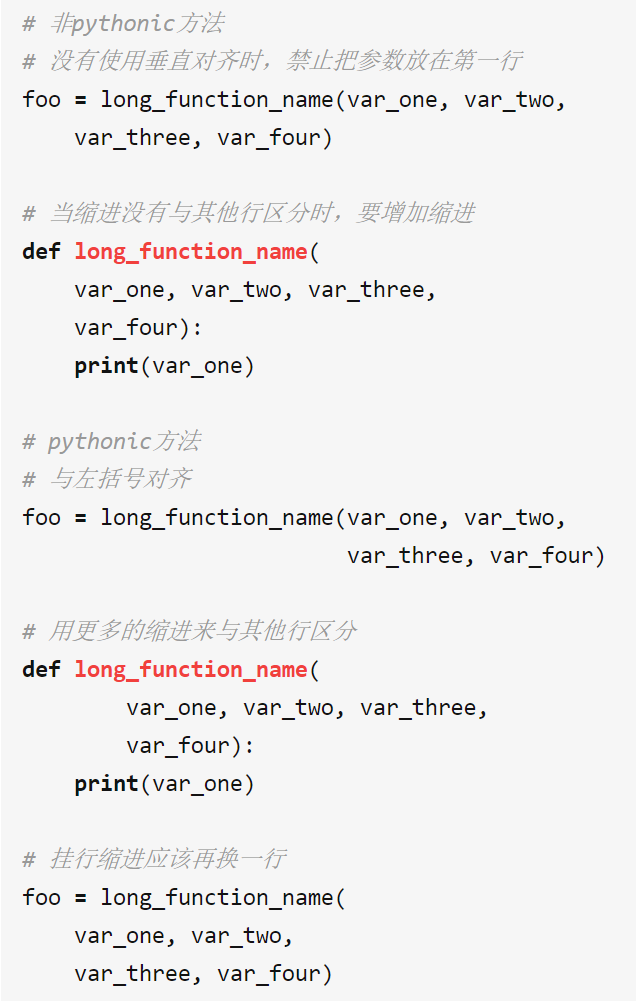

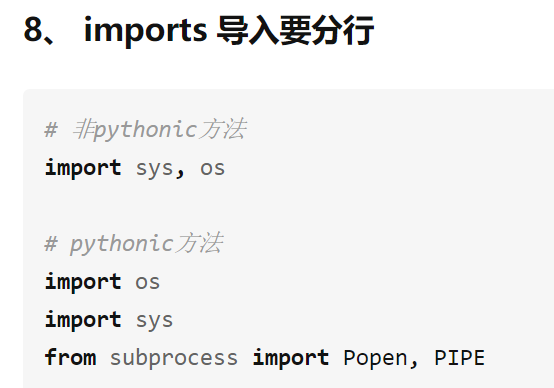

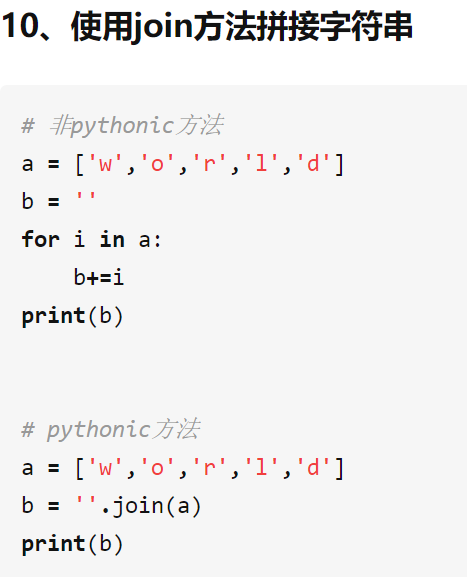

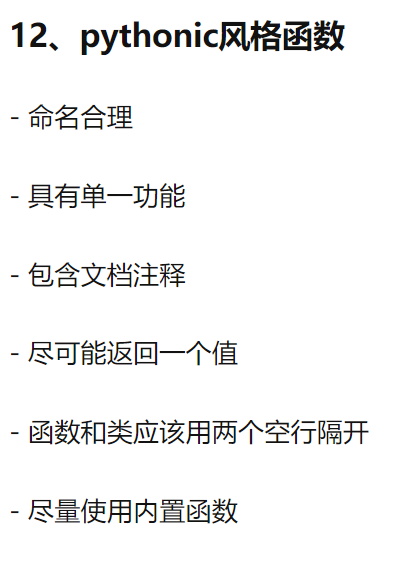

## 其他常用的库

### dis库 - python代码分析工具（disassemble）
dis库是python(默认的CPython)自带的一个库,可以用来分析字节码

Python是用C来实现的，所以对于Python的性能或代码质量的评估可以通过dis模块获取到对应的字节码指令来进行评估。

Python代码是先被编译为Python字节码后，再由Python虚拟机来执行Python字节码（pyc文件主要就是用于存储字节码指令 的）。一般来说一个Python语句会对应若干字节码指令，Python的字节码是一种类似汇编指令的中间语言，但是一个字节码指令并不是对应一个机器指 令（二进制指令），而是对应一段C代码，而不同的指令的性能不同，所以不能单独通过指令数量来判断代码的性能，而是要通过查看调用比较频繁的指令的代码来 确认一段程序的性能。

dis模块主要是用来分析字节码的一个内置模块，经常会用到的方法是dis.dis([bytesource])，参数为一个代码块，可以得到这个代码块对应的字节码指令序列。

In [43]:
# 应用一 ： 使用dis模块来判断哪种代码的运行速度更快
import dis

def func():
    a = list()
    b = []
    
print(dis.dis(func))

'''可以看出 a = list() 这种写法包括了 CALL_FUNCTION 行为， 
在Python中进行 function call，需要创建一个栈，然后进行参数检查之类的操作，
显然没有直接使用 [] 这种内置的C函数效率高'''

  5           0 LOAD_GLOBAL              0 (list)
              2 CALL_FUNCTION            0
              4 STORE_FAST               0 (a)

  6           6 BUILD_LIST               0
              8 STORE_FAST               1 (b)
             10 LOAD_CONST               0 (None)
             12 RETURN_VALUE
None


In [45]:
# 应用二 ： 判断数据安全
import dis 
def func1():
    a = 0
    a + 1
print(dis.dis(func1),'\n')
def func2():
    a = 0
    a += 1
print(dis.dis(func2))

  4           0 LOAD_CONST               1 (0)
              2 STORE_FAST               0 (a)

  5           4 LOAD_FAST                0 (a)
              6 LOAD_CONST               2 (1)
              8 BINARY_ADD
             10 POP_TOP
             12 LOAD_CONST               0 (None)
             14 RETURN_VALUE
None 

  8           0 LOAD_CONST               1 (0)
              2 STORE_FAST               0 (a)

  9           4 LOAD_FAST                0 (a)
              6 LOAD_CONST               2 (1)
              8 INPLACE_ADD
             10 STORE_FAST               0 (a)
             12 LOAD_CONST               0 (None)
             14 RETURN_VALUE
None


如果只是读取数据时，如读取一个函数，此时数据是安全的，因为没有涉及任何修改，
当改数据时，可能会涉及数据不安全，如多个线程同时修改一个数据，原因是一句代码对应了多条cpu指令，如有4条指令，当执行完第二条时，cpu时间片轮转了，此时数据可能发生错误。
所以任何 += -= *- 都是数据不安全的

在以上源码中可以看见后者有store操作

甚至可以dis(dis)自己
查看dis源码

In [ ]:
def dis(x=None, *, file=None):
    """Disassemble classes, methods, functions, generators, or code.
    With no argument, disassemble the last traceback.
    """
    if x is None:
        distb(file=file)
        return
    if hasattr(x, '__func__'):  # Method
        x = x.__func__
    if hasattr(x, '__code__'):  # Function
        x = x.__code__
    if hasattr(x, 'gi_code'):  # Generator
        x = x.gi_code
    if hasattr(x, '__dict__'):  # Class or module
        items = sorted(x.__dict__.items())
        for name, x1 in items:
            if isinstance(x1, _have_code):
                print("Disassembly of %s:" % name, file=file)
                try:
                    dis(x1, file=file)
                except TypeError as msg:
                    print("Sorry:", msg, file=file)
                print(file=file)
    elif hasattr(x, 'co_code'): # Code object
        disassemble(x, file=file)
    elif isinstance(x, (bytes, bytearray)): # Raw bytecode
        _disassemble_bytes(x, file=file)
    elif isinstance(x, str):    # Source code
        _disassemble_str(x, file=file)
    else:
        raise TypeError("don't know how to disassemble %s objects" %
                        type(x).__name__)
    
from dis import dis
dis(dis)

x参数可以是None、Method、Function、Generator、Class、module、Code object、Raw bytecode、Source code,如果x是Method、Function、Generator,只用返回对应的字节码,
如果x是Class或者module,那会返回x的所有元素(先排序)的字节码,这一句代码x.dict.items()有提现.如果x是Code object或者Raw bytecode,或者Source code,那么会调用对应的disassemble函数. disassemble函数是干嘛的呢,顾名思义,就是assemble的反义词, assemble是汇编的意思,那disassemble自然是有一个 反汇编 的意思,当然这里并不是真的反汇编,而是只是输出字节码.

disassemble的函数细节可以自己去看看源码,源码也在dis.py里

### multiprocess

    我们现代计算机的cpu是有多个核的，如果你有一个复杂的运算想要加速，可以考虑多核并行运算

In [1]:
# 查看cpu的核数，运行时以逻辑核数为准
import psutil # 安装库 - pip install psutil
def get_cpu_info():
    cpu1 = psutil.cpu_count()
    cpu2 = psutil.cpu_count(logical=False)
    print("cpu逻辑个数:", cpu1)
    print("cpu真实内核个数:", cpu2)
get_cpu_info()

cpu逻辑个数: 8
cpu真实内核个数: 4


In [ ]:
# 【0】.multiprocessing模块提供了一个Process类来代表一个进程对象，下面的例子演示了启动一个子进程并等待其结束
from multiprocessing import Process
import os

# 子进程要执行的代码
def run_proc(name):
    print('Run child process %s (%s)...' % (name, os.getpid()))

print('Parent process %s.' % os.getpid())
p = Process(target=run_proc, args=('test',))
print('Child process will start.')
p.start()
p.join()
print('Child process end.')
'''创建子进程时，只需要传入一个执行函数和函数的参数，创建一个Process实例，用start()方法启动，这样创建进程比fork()还要简单。
join()方法可以等待子进程结束后再继续往下运行，通常用于进程间的同步'''

In [ ]:
'''要启动大量的子进程，可以用进程池的方式批量创建子进程'''
def long_time_task(name):
    print('Run task %s (%s)...' % (name, os.getpid()))
    start = time.time()
    time.sleep(random.random() * 3)
    end = time.time()
    print('Task %s runs %0.2f seconds.' % (name, (end - start)))


def main():
    print('逻辑cpu数量为 : ',cpu_count())
    print('Parent process %s.' % os.getpid())
    p = Pool(8) # pool默认大小在电脑上是8，最多同时执行8个进程，pool的默认大小为CPU的核数
    for i in range(9): # task 0-7是立刻执行的，而task8要等待前面某个task完成后才执行，这是因为Pool的默认大小在我的电脑上是8，因此，最多同时执行8个进程。这是Pool有意设计的限制，并不是操作系统的限制
        p.apply_async(long_time_task, args=(i,))
    print('Waiting for all subprocesses done...')
    p.close() # 调用join之前必须先调用close，close后就不能继续添加新的process
    p.join() # 对pool对象调用join方法会等待所有子进程执行完毕
    print('All subprocesses done.')

# 当前本机 - 联想小新 - 4核8线程(逻辑cpu数量为8) - 使用时可以当作八核
if __name__ == '__main__':
    main()

## 其他常用数据结构

### 双端队列
collections.deque

deque是双端队列（double-ended queue）的缩写，由于两端都能编辑，deque既可以用来实现栈（stack）也可以用来实现队列（queue）。

deque支持丰富的操作方法，主要方法如图：
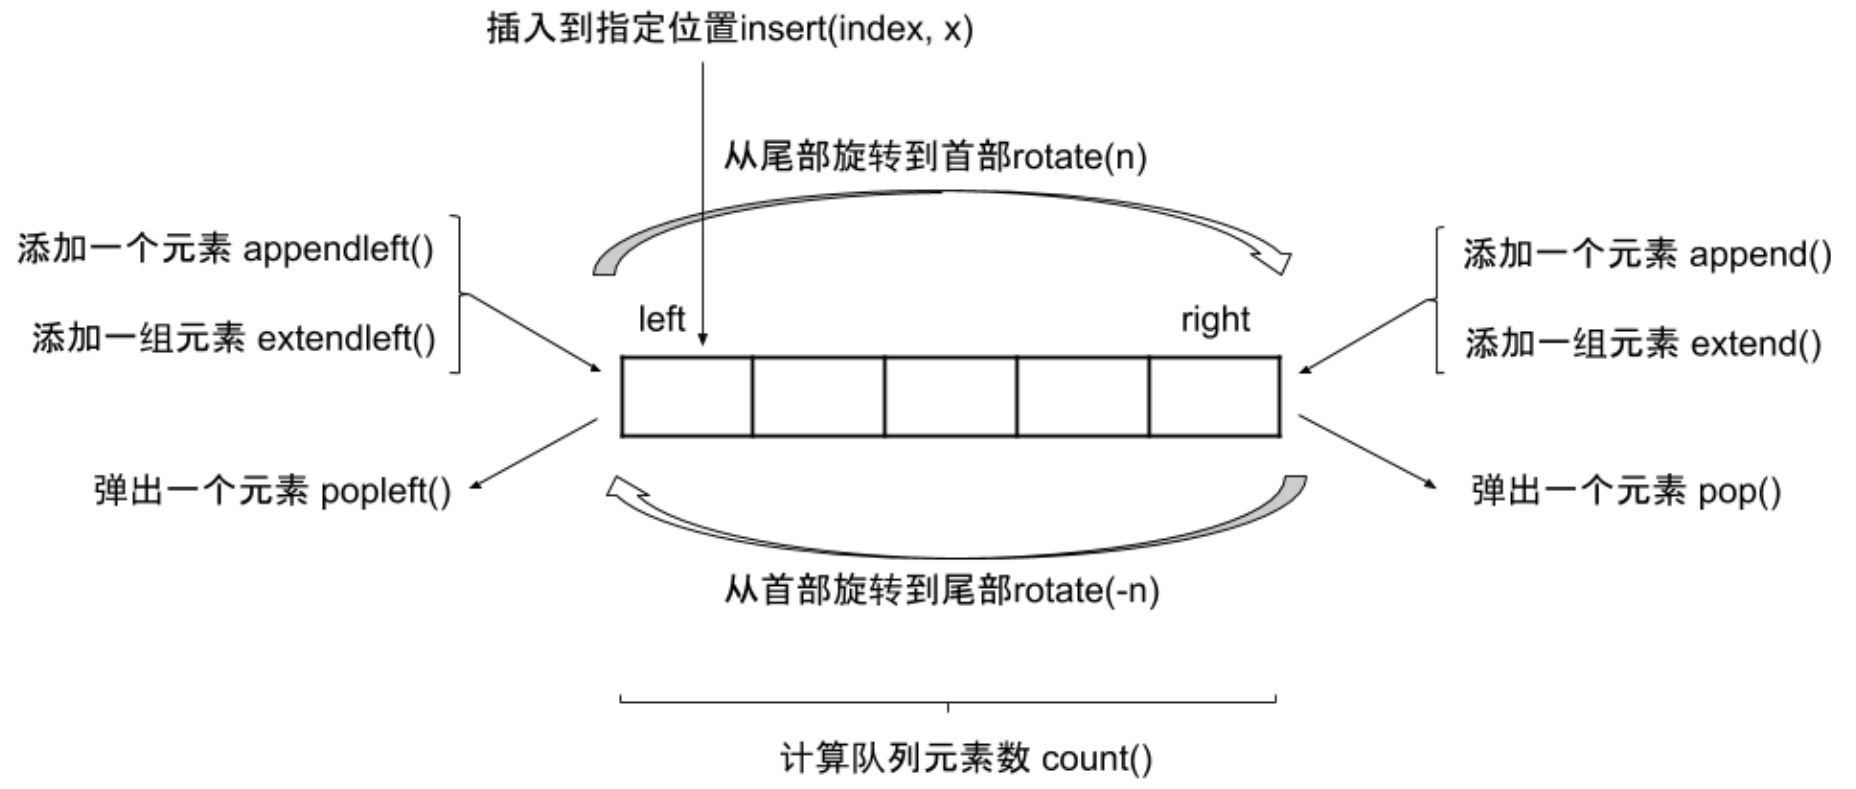

相比于list实现的队列，deque实现拥有更低的时间和空间复杂度。list实现在出队（pop）和插入（insert）时的空间复杂度大约为O(n)，deque在出队（pop）和入队（append）时的时间复杂度是O(1)。

线程安全方面，通过查看collections.deque中的append()、pop()等方法的源码可以知道，他们都是原子操作，所以是GIL保护下的线程安全方法。具有很高的性能

In [40]:
from collections import deque
q = deque([1,2,3,4])
print(5 in q) # 支持in操作符
print(1 in q,'\n')

q.rotate(1) # 顺时针旋转一个单位
print(q)
q.rotate(-1) # 逆时针旋转一个单位
print(q,'\n')

a = q.popleft()
print(a)
b = q.pop()
print(b)
print(q,'\n')

q.appendleft(6)
print(q)
q.extendleft([1,2,3]) # 注意左边的extend是倒序加入
print(q)

False
True 

deque([4, 1, 2, 3])
deque([1, 2, 3, 4]) 

1
4
deque([2, 3]) 

deque([6, 2, 3])
deque([3, 2, 1, 6, 2, 3])


In [42]:
# little trick ： 通过dis库的dis方法查看操作的底层字节码
import dis
def foo():
    q = deque()
    q.append()
    
dis.dis(foo)

  3           0 LOAD_GLOBAL              0 (deque)
              2 CALL_FUNCTION            0
              4 STORE_FAST               0 (q)

  4           6 LOAD_FAST                0 (q)
              8 LOAD_METHOD              1 (append)
             10 CALL_METHOD              0
             12 POP_TOP
             14 LOAD_CONST               0 (None)
             16 RETURN_VALUE


## 其他常用函数

### map/reduce

我们先看map。map()函数接收两个参数，一个是函数，一个是Iterable，map将传入的函数依次作用到序列的每个元素，并把结果作为新的Iterator返回。

举例说明，比如我们有一个函数f(x)=x2，要把这个函数作用在一个list [1, 2, 3, 4, 5, 6, 7, 8, 9]上，就可以用map()实现如下：

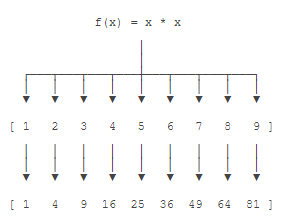

In [3]:
# map的例子
def f(x):
     return x * x

r = map(f, [1, 2, 3, 4, 5, 6, 7, 8, 9])
print(type(r))
print(list(r)) # 由于结果r是一个Iterator，Iterator是惰性序列，因此通过list()函数让它把整个序列都计算出来并返回一个list。

<class 'map'>
[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [4]:
print(list(map(str,[1,2,34,5,6,7]))) # 一行搞定

['1', '2', '34', '5', '6', '7']


再看reduce的用法。reduce把一个函数作用在一个序列[x1, x2, x3, ...]上，这个函数必须接收两个参数，reduce把结果继续和序列的下一个元素做累积计算，其效果就是

    reduce(f, [x1, x2, x3, x4]) = f(f(f(x1, x2), x3), x4)

In [5]:
# 把序列[1, 3, 5, 7, 9]变换成整数13579，reduce就可以派上用场
from functools import reduce
def fn(x, y):
     return x * 10 + y
reduce(fn, [1, 3, 5, 7, 9])

13579

In [7]:
# 例子： 一个str2int的函数
from functools import reduce

DIGITS = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

def str2int(s):
    def fn(x, y):
        return x * 10 + y
    def char2num(s):
        return DIGITS[s]
    return reduce(fn, map(char2num, s))
print(str2int('45332'))

45332


In [8]:
# 用lambda函数进一步简化
from functools import reduce

DIGITS = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

def char2num(s):
    return DIGITS[s]

def str2int(s):
    return reduce(lambda x, y: x * 10 + y, map(char2num, s))
print(str2int('45332'))

45332


### filter

    filter()也接收一个函数和一个序列。和map()不同的是，filter()把传入的函数依次作用于每个元素，然后根据返回值是True还是False决定保留还是丢弃该元素。filter()函数返回的是一个Iterator，也就是一个惰性序列，所以要强迫filter()完成计算结果，需要用list()函数获得所有结果并返回list

In [9]:
# 把一个序列中的空字符串删掉
def not_empty(s):
    return s and s.strip()

list(filter(not_empty, ['A', '', 'B', None, 'C', '  ']))
# 结果: ['A', 'B', 'C']

['A', 'B', 'C']

In [10]:
# 在一个list中，删掉偶数，只保留奇数
def is_odd(n):
    return n % 2 == 1

list(filter(is_odd, [1, 2, 4, 5, 6, 9, 10, 15]))
# 结果: [1, 5, 9, 15]

[1, 5, 9, 15]

### lambda
lambda表达式是一种匿名函数，对应python中的自定义函数def，是定义某个函数时比较高级的一种写法。lambda 函数可接受任意数量的参数，但只能有一个表达式。

一个 lambda 函数，它把参数 a 与参数 b 相乘并打印结果：
x = lambda a, b : a * b
print(x(5, 6))

### format()

新增了一种格式化字符串的函数 str.format()，它增强了字符串格式化的功能。
基本语法是通过 {} 和 : 来代替以前的 % ,即为传入的参数取代前面的{}的位置
format 函数可以接受不限个参数，位置可以不按顺序。

"{} {}".format("hello", "world")    # 不设置指定位置，按默认顺序
'hello world'

### join() 方法
用于将序列中的元素以指定的字符连接生成一个新的字符串。
str = "-";
seq = ("a", "b", "c"); # 字符串序列
print str.join( seq );
 => a-b-c

myTuple = ("Bill", "Steve", "Elon")
x = "#".join(myTuple)
print(x)
 => Bill#Steve#Elon
 
### split() 
通过指定分隔符对字符串进行切片，如果参数 num 有指定值，则分隔 num+1 个子字符串。

str.split(str="", num=string.count(str)).

str = "Line1-abcdef \nLine2-abc \nLine4-abcd";

print str.split( );       # 以空格为分隔符，包含 \n

print str.split(' ', 1 ); # 以空格为分隔符，分隔成两个

txt = "Google#Runoob#Taobao#Facebook"

x = txt.split("#", 1)

以上实例输出结果如下：

['Line1-abcdef', 'Line2-abc', 'Line4-abcd']

['Line1-abcdef', '\nLine2-abc \nLine4-abcd']

['Google', 'Runoob#Taobao#Facebook']